# Can Machine Learning improve the yield?

#MACHINE LEARNING FOR OPTIMIZED CASE-FINDING (OCF)
##Rationale

There was predicted total number of recruited HIV+ peers who have never been registered in AIDS center.
Our task to find peers whith recruit more new.
Out target:  to develop a prediction model for finding HIV positives in the recruitment network using machine learning. How many steps have to be to find.

The benefit of prediction could include raising of effectiveness for hard-to-reach populations and deraising supporting costs.

In [1]:
def binary_classification_validation(df, lift=1):
    """
    #Example:
    import numpy as np
    import pandas as pd
    from sklearn.calibration import calibration_curve
    sample = [np.random.uniform() for i in range(1000)]
    df = pd.DataFrame()
    df['OBSERVED_TARGET'] = [np.random.binomial(1, i, size=None) for i in sample]
    df['PREDICTED_TARGET'] = [np.random.binomial(1, i*0.8, size=None) for i in sample]
    df['EVENT_PROB'] = [i*0.8 for i in sample]
    binary_classification_validation(df)
    """
    print(' #### Accuracy: ')
    try:
        print("\nModel Accuracy: %0.2f" % (sklearn.metrics.accuracy_score(df['OBSERVED_TARGET'], df['PREDICTED_TARGET']) *100) + "%")
        print (" \nCohen's Kappa: %0.2f" % (sklearn.metrics.cohen_kappa_score(df['OBSERVED_TARGET'], df['PREDICTED_TARGET']) *100) + "%")
    except:
        print( ' ERROR ')

    print(' #### Classification Report: ')
    try:
        print(sklearn.metrics.classification_report(df['OBSERVED_TARGET'] , df['PREDICTED_TARGET']))
    except:
        print(' ERROR')

    print( ' #### Confusion Matrix ')
    try: 
        x = sklearn.metrics.confusion_matrix(df['OBSERVED_TARGET'], df['PREDICTED_TARGET'], labels = [1,0])
        confusion_matrix = pd.DataFrame(x, columns = ['Pred = 1', 'Pred = 0'], index = ['Obsv = 1', 'Obsv = 0'])
        print(confusion_matrix.to_string())
        #df['PREDICTED_TARGET'].sum()
    except:
        print( 'ERROR')
    print(' # I. Precision Recall curve')
    print(' Calculations')
    try:
        precision, recall, thresholds = sklearn.metrics.precision_recall_curve(df['OBSERVED_TARGET'] , df ['EVENT_PROB'])
    except:
        print(' ERROR ')
    try:
        thresholds = np.append(thresholds, 1)#add 1 since there is n thresholds + 1 points in precision and recall
    #print (len (precision) , len (recall) , len (thresholds) )
    # queue rate is the # of the population that is probable to churn according to the threshold
        queue_rate = []
        for threshold in thresholds:
            queue_rate.append((df['EVENT_PROB'] >= threshold).mean())
        #Get index or 0.5 threshold
        index_p5 = np.where(thresholds>=0.5)[0][0]
        # get index for example of x of queue rate
        ##example_que_ratio = 0.10
        ##index_ex = np.where(np.asarray(queue_rate) <= example_que_ratio)[0][0]
        # Compute Area Under the curve (AUC) using the trapezoidal rule
        auc_PR = sklearn.metrics.auc(recall, precision)
    except:
        print('ERROR')
    print(' ### I.a. Precision-Reeall')
    print(' Plot Precision—Recall curve')
    try:
        plt.figure(figsize = [8,8])
        plt.plot(recall, precision, label='Precision-Recall Curve', color = 'r')
        plt.plot(recall[index_p5], precision[index_p5], 'or')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.0])
        plt.xlim([0.0, 1.0])
        plt.title('Precision—Recall Curve')
        plt.legend(loc="upper right")
        plt.grid(b=True, which='major', color=[0.9, 0.9, 0.9], linestyle='-')
        plt.show()
    except:
        print('ERROR')
    print('')
    try:
        print("Area Under PR Curve (AP): %0.2f" % auc_PR) #should be same as AP>
    except:
        print ('ERROR')
    print(' ### I.b. Precision Recall and Queue plot')
    try:
        plt.figure(figsize = [8,8])
        plt.plot(thresholds, precision, 'b')
        plt.plot(thresholds, recall, 'r')
        plt.plot(thresholds, queue_rate, 'k')
        plt.plot(thresholds[index_p5], precision[index_p5], 'ob')
        plt.plot(thresholds[index_p5], recall[index_p5], 'or')
        plt.plot(thresholds[index_p5], queue_rate[index_p5] , 'ok')
        #example line
        #plt.plot([0,1], [example_que_ratio, example_que_ratio] , '--' , lw = 2, color=[0.7, 0.7, 0.7])
        #plt.plot(thresholds[index_ex], thresholds[index_ex] , [0,1], '--' , lw = 2, color=[0.7, 0.7, 0.7])
        plt.legend(('Precision' , 'Recall', 'Queue Rate'), frameon=True, loc="upper center")
        plt.xlabel('Probability Threshold')
        plt.ylabel('Ratio')
        plt.title('Precision-Recall—Queue Rate curve')
        plt.grid(b=True, which='major', color=[0.9, 0.9, 0.9], linestyle='-')
        plt.show()
    except:
        print('ERROR')

    print(' # II. ROC')
    # ROC Calculations
    try:
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(df['OBSERVED_TARGET'] , df['EVENT_PROB'], drop_intermediate=False)
        roc_auc = sklearn.metrics.auc(fpr, tpr)
        print(' ROC Plot')
        plt.figure(figsize = [8,8])
        lw = 2
        plt.plot(fpr, tpr, color='r', lw=lw, label='ROC curve (Area = %0.2f) ' % roc_auc)
        plt.plot([0,1], [0,1], color='k', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel ("False Positive Rate (1—Specificity)")
        plt.ylabel('True Positive Rate (Sensitivity or recall)') 
        plt.title('Receiver Operating Characteristic Churn Predictions')
        plt.legend(loc="lower right")
        plt.show()
    except:
        print('ERROR')
    
    if lift == 0:
        return 
    
    print(' # III. Lift Chart')
    try: 
        df['PRED_DECILE'], deciles = pd.qcut(-df['EVENT_PROB'], 10, labels=False, retbins=True)
    except:
        try:
            df['PRED_DECILE'], deciles = pd.qcut(-df['EVENT_PROB'], 5, labels=False, retbins=True)
        except:
            df['PRED_DECILE'], deciles = pd.qcut(-df['EVENT_PROB'], 4, labels=False, retbins=True)
    try:
        decile_limits = list(zip(-deciles[0:1], -deciles[1:]))
    except:
        print('ERROR')

    #stats on whole dataset
    try:
        positive_obs = df['OBSERVED_TARGET'].sum()
        total_obs = df['OBSERVED_TARGET'].count()
        positive_obs_ratio = positive_obs/float(total_obs)
    except:
        print('ERROR')
    
    print(' #### Group by predicted probability deciles')
          
    # new df Grouped By PREDICTED probability deciles
    try:
        df_decile_grp = df.groupby('PRED_DECILE')
        #Consolidate Results into Output Dataframe
        lift_df = pd.DataFrame({'NUMBER_OF_OBSERVATIONS': df_decile_grp['OBSERVED_TARGET'].count(), 'NUMBER_OF_RESPONCES': df_decile_grp['OBSERVED_TARGET'].sum()})
        lift_df['CUMULATIVE_RESPONSE'] = lift_df['NUMBER_OF_RESPONCES'].cumsum()
        lift_df['RESPONCE_RATE'] = round(lift_df['NUMBER_OF_RESPONCES']/lift_df['NUMBER_OF_OBSERVATIONS']*100, 2)
        lift_df['%_RIGHT'] = round(lift_df['NUMBER_OF_RESPONCES']/positive_obs*100, 2)
        lift_df['GAIN'] = round(lift_df['CUMULATIVE_RESPONSE']/positive_obs*100, 2)
        lift_df['%_POPULATION'] = round(lift_df['NUMBER_OF_RESPONCES']/total_obs*100, 2)
        lift_df['LIFT@DECILE'] = lift_df['%_RIGHT']/lift_df['%_POPULATION']
        
        lift_df['CUM%_POPULATION'] = round(lift_df['NUMBER_OF_OBSERVATIONS']/total_obs*100, 2).cumsum()
        lift_df['CUMULATIVE_LIFT'] = round(lift_df['GAIN']/lift_df['CUM%_POPULATION'],2)
    except:
        print('ERROR')
        
    try:
        print("Total positive observation: " + str(positive_obs))
        print("Total observations: " + str(total_obs))
        print("Observed Positive Class Rate: %0.2f" % (positive_obs_ratio*100)+" %")
        print("\nDecile Limits:")
        print(decile_limits)
    except:
        print('ERROR')
        
    print(' ### III.a. Observed Responce Rate')
    try:
        ##higher_bin = (np.where(lift_df['RESPONCE_RATE'] >= (positive_obs_ratio*100))[0][-1])+1
        plt.figure(figsize = [8,8])
        ax = lift_df['RESPONCE_RATE'].plot(kind='bar', title = "Observed Responce rate (Churn Rate) by Prediction Probability Deciles", figsize = [8,8], legend = True, fontsize=12, color = [0.7,0.7,0.7])
        plt.plot([list(lift_df.index)[0], list(lift_df.index)[-1]], [(positive_obs_ratio*100),(positive_obs_ratio*100)], 'r')
        ax.set_xticklabels(list(lift_df.index+1))
        ax.set_xlabel('Prediction Deciles [Desc]')
        ax.set_ylabel('Responce Rate')
        ax.set_ylim([0,100])
        ax.legend(('Overall Responce Rate', 'Responce Rate per Decile'));
        plt.show()
    except:
        print('ERROR')
    
    print(' ### III.b. Lift Chart')
    print('')
    try:
        plt.figure(figsize=[8,8])
        plt.plot(list(lift_df.index+1), lift_df['CUMULATIVE_LIFT'], color='r')
        plt.plot([1,len(list(lift_df.index+1))], [1,1], color='k', linestyle='--')
        plt.xlabel('Prediction Deciles [Desc]')
        plt.ylabel('Lift')
        plt.title("Lift Chart")
        plt.legend(('Model','Random'), frameon=True, loc='upper right')
        plt.grid(b=True, which='major', color=[0.9,0.9,0.9], linestyle='-')
        plt.ylim([0,2.25])
        plt.show()
    except:
        print('ERROR')
    
    try:
        fraction_of_positives, mean_predictived_value = calibration_curve(df['OBSERVED_TARGET'], df['EVENT_PROB'], n_bins=len(list(lift_df.index)))
        plt.figure(figsize=[8,8])
        ax1 = plt.subplot2grid((2,1),(0,0),rowspan=2)
        ax1.plot([0,1], [0,1], "k:", label='Perfectly Calibrated')
        ax1.plot(mean_predictived_value, fraction_of_positives, "s-", label = 'Model', color='r')
        ax1.set_xlabel("Mean Predicted Probability")
        ax1.set_ylabel("Fraction of Positives")
        ax1.set_ylim([0,1])
        ax1.legend(loc="upper left")
        ax1.set_title('Calibration Plots (Reliability Curve)')
        plt.tight_layout()
        plt.show()
    except:
        print('ERROR')

In [2]:
def classifier_performance(classifier, y_true, y_pred, y_pred_proba):
    print('Predicted_Classes:', classifier.classes_)
    print('Classification Report:')
    print(sklearn.metrics.classification_report(y_true, y_pred))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(y_true, y_pred))
    try:
        print('Accuracy:', sklearn.metrics.accuracy_score(y_true, y_pred))
    except:
        print('Accuracy: FAILED')
    try:
        print("AUC:", sklearn.metrics.roc_auc_score(y_true, y_pred_proba))
    except:
        print('AUC: FAILED')



In [3]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

#Here i specify the path of the dataset location which is in 
#root_dir = "/content/gdrive/My Drive/AI"

In [3]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV 

In [4]:
# Import Required Libraries
import numpy as np # one of the basic libraries for Python analysis; arrays operations, math ect.
import matplotlib.pyplot as plt # library for visualisation
import datetime as dt # library for date and time operations 
import pandas as pd # one of the basic libraries for Python analysis; holds DataFrame object
import copy # libary that allows to create unlinked copy of an object; it is important to remember that Python creates an allias of a non-primitive object with "=" operator, so if one need a true copy of an object, "copy" library shoud be used
import random # library for random numbers generation
import sklearn.ensemble # part of a sklearn scientific library that holds enseble methods of data analysis such as random forest and gradient boosting
import sklearn.metrics # part of a sklearn scientific library that holds metrics such as metrics for predictors validation (accuracy, auc, R-squared ect.)
import sklearn.naive_bayes # part of a sklearn scientific library that holds naibe_bias implementation
import sklearn.neighbors # part of a sklearn scientific library that holds "nearest neighbours" implementation

from scipy.stats import randint as sp_randint # random integer number generator
from sklearn.model_selection import RandomizedSearchCV # part of a sklearn scientific library that holds RandomizedSearchCV algorithm of hyper parameters tuning
from time import time # library for date and time operations

from sklearn.calibration import calibration_curve # part of a sklearn scientific library that holds calibration curve tool for model validation

from sklearn.metrics import classification_report # part of a sklearn scientific library that holds classication report implementation
from sklearn.metrics import confusion_matrix # part of a sklearn scientific library that holds confusion matrix of a classifier implementation

np.random.seed(123456789)

C:\Anaconda_Python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
#rcParams['figure.figsize'] = 20,10
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [6]:
#Create Sample
#Import Data From Excel File
#data = pd.read_excel(root_dir+"/OCF.xlsx", sheet_name = "Dataset")
#Import and view dictionary of features that sample contains
#dictionary = pd.read_excel(root_dir+"/OCF.xlsx", sheet_name = "Dictionary")

data = pd.read_excel("E://OCF.xlsx", sheet_name = "Dataset")
#Import and view dictionary of features that sample contains
dictionary = pd.read_excel("E://OCF.xlsx", sheet_name = "Dictionary")

## Describing the setting (dataset)

### What data we are colective?

In [8]:
for i, row in dictionary.iterrows():
    print(row['RecordDate'], ' - ',row['Date of recruitment'])   

Year  -  Year of recruitment
UniqueID  -  Client ID
VisitsCount  -  Number of visits (repeated recruitments)
Age  -  Age in years
Sex  -  Sex (M=male, F=female, T=transgender)
Region  -  Region
HarmReduction  -  Participation in harm reduction programs
MaritalStatus  -  Marital status
PatientZpt  -  Patient of opioid substitution treatment
Yearsinjecting  -  Years of injecting drug use (0 = no injecting drug use)
Sexpartners  -  Number of sexual partners in the past month
Imprisonment  -  History of incarceration
RiskGroup  -  Key population
Relation  -  Relation to recruiter
OCFtest.result  -  HIV rapid test result (clinical data)
AIDSregistrationdate  -  Date of registration in AIDS center if available (self-report)
ARTdate  -  Date of ART (antiretroviral treatment) initiation if available (self-report)
TypeofposART  -  Type of HIV+ client by AIDS center registration and ART status - calculated
Incoupons  -  In-coupon (entry coupon) 
InCouponsTypes  -  Type of in-coupon (invitation /

**There are 50196 individuals in 12 regions of Ukraine in the dataset from '2017-01-03 ' to '2018-03-30'. Majority size visiting of the center by a person only one time during the period. The range age is from 35 years old to 99 but most of persons are 25-50 years old.**
**Most relation to recruiter are "Drug use partner" and "Acquaintance".**

**Seeds:** HIV(+) PWID who were clients of harm reduction programs, 14+ years 

**Recruits:** participants got coupons to invite their peers:

- injecting partner
- sexual partner 
- sexual or injecting partner of somebody from the social network who can be also at risk of HIV


**Most of HIV rapid test results (clinical data) are negative.**

**Most of type of 'risk group (Key population)' is PWID.**

**There are not transgender individuals.**

In [9]:
data.groupby('Region')['UniqueID'].count().reset_index().sort_values(['UniqueID'], ascending=False)

,Region,UniqueID
2,dnipropetrovska,18219
5,kyiv,13952
9,odeska,5727
6,kyivska,3670
0,cherkasy,2390
8,mykolaivska,1450
10,poltavska,1098
3,donetska,1062
11,zaporizhzhia,989
7,kyrovograd,715


**Most data from Dnipropetrovsky and Kyiv regions.**

Year


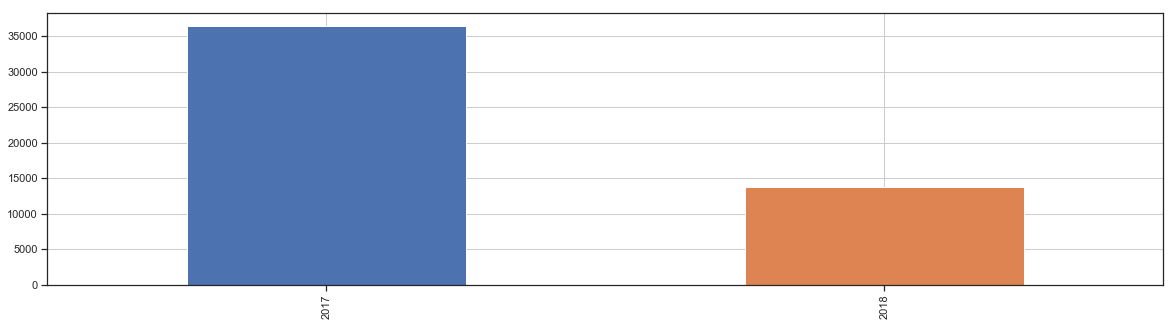

VisitsCount


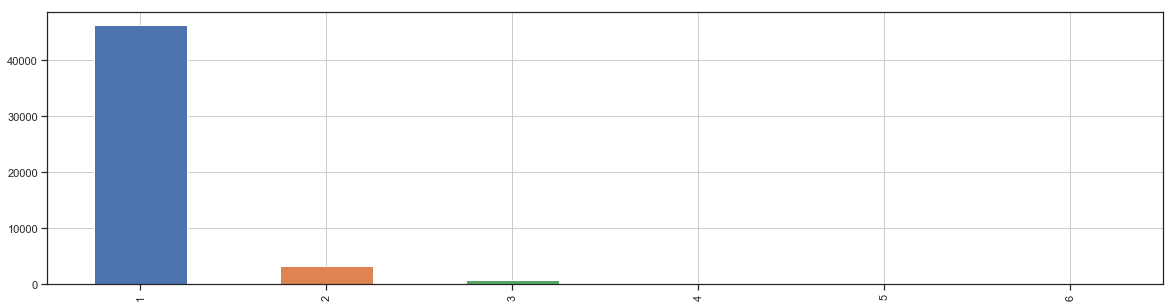

Age


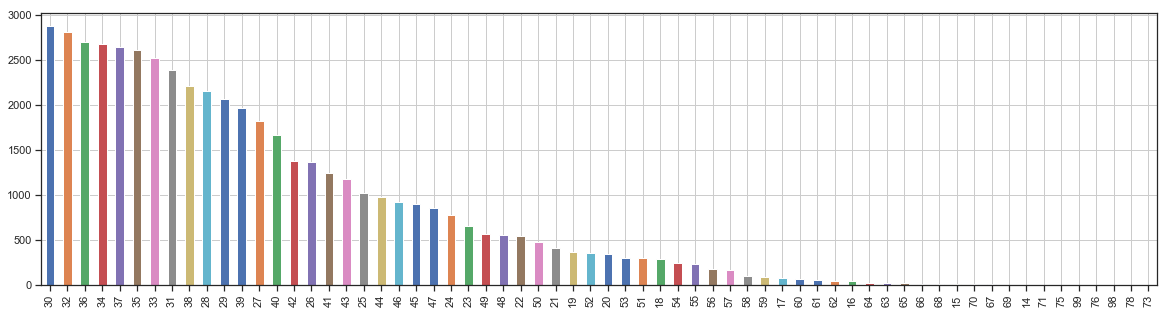

Sex


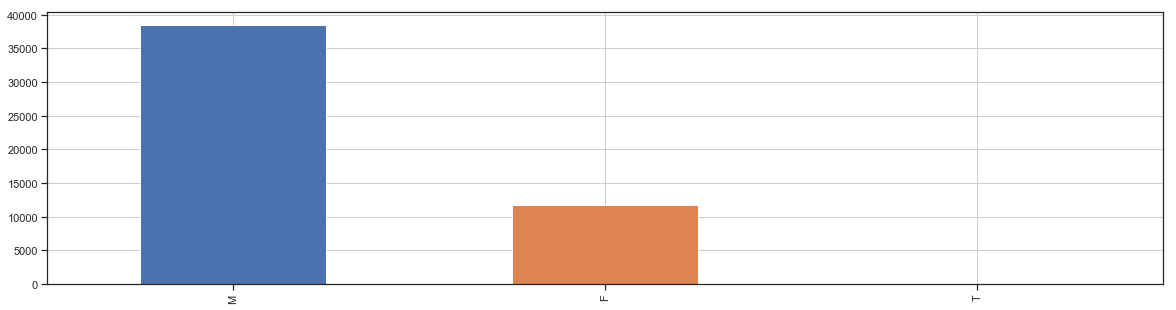

Region


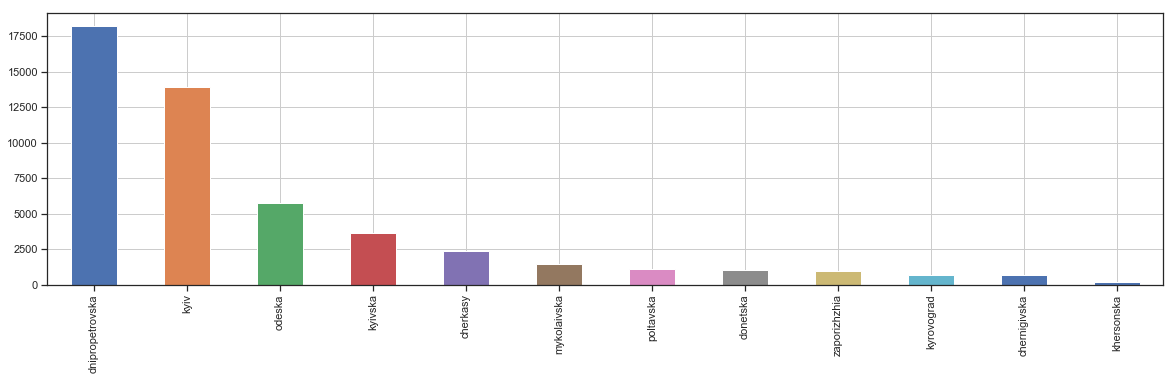

HarmReduction


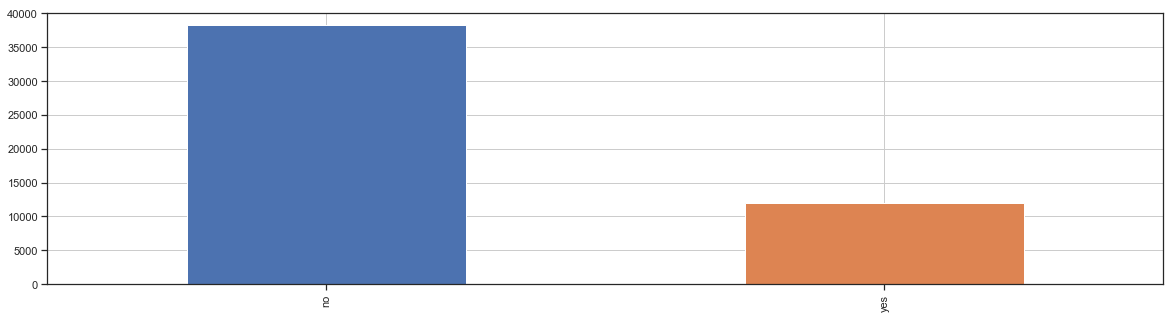

MaritalStatus


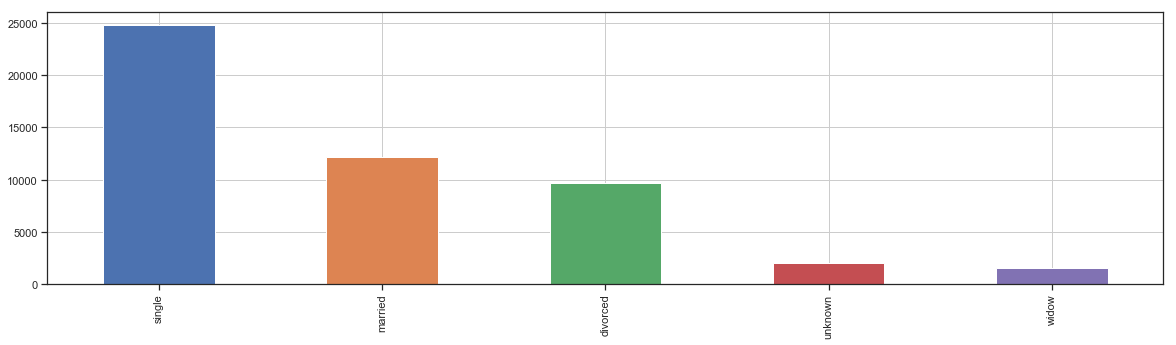

PatientZpt


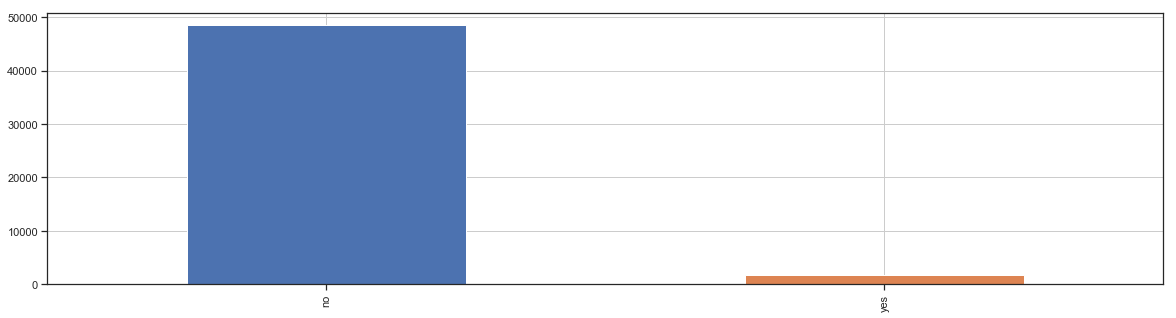

Yearsinjecting


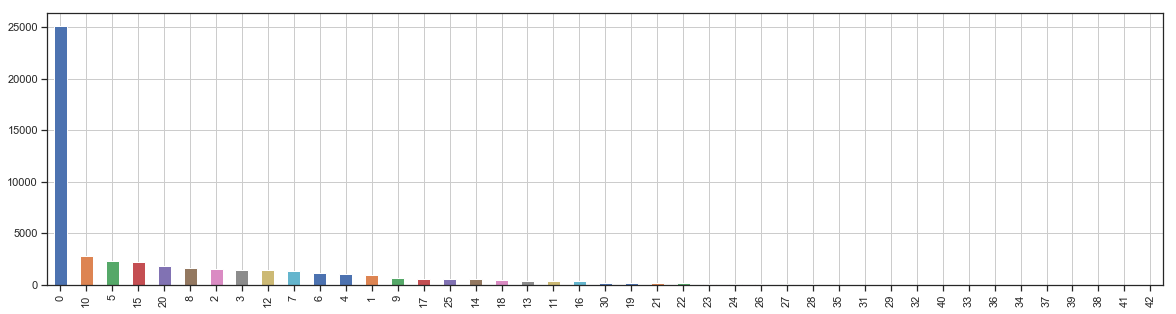

Sexpartners


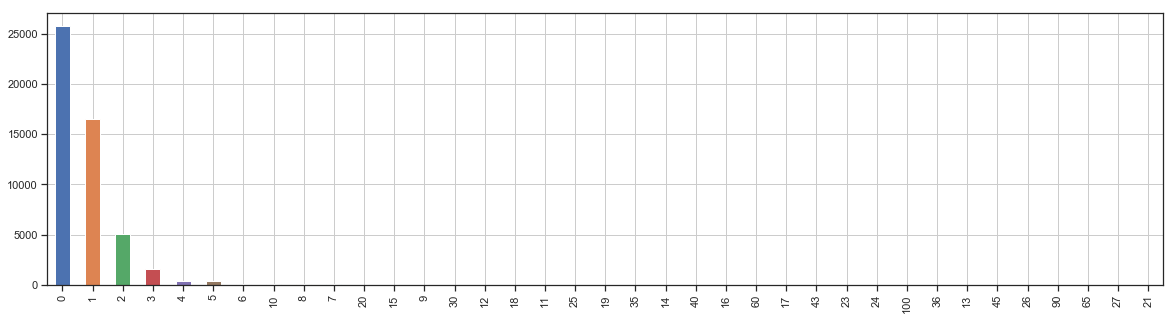

Imprisonment


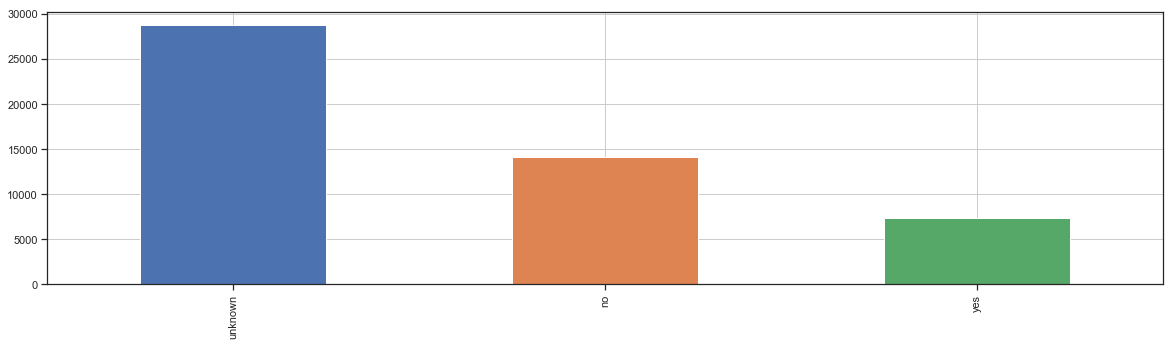

RiskGroup


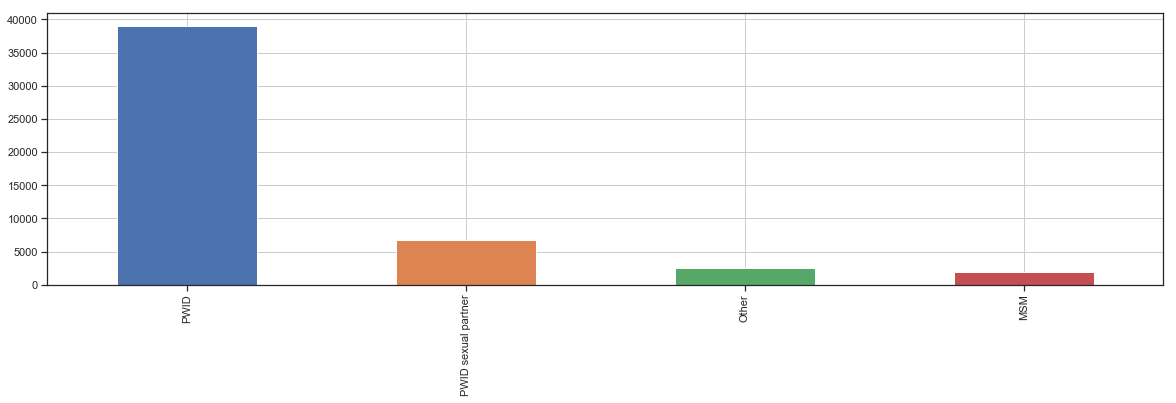

Relation


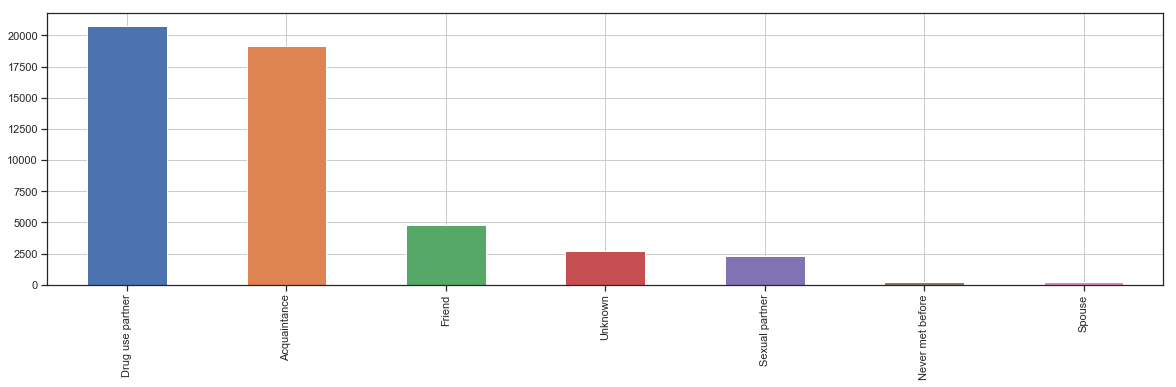

OCFtest.result


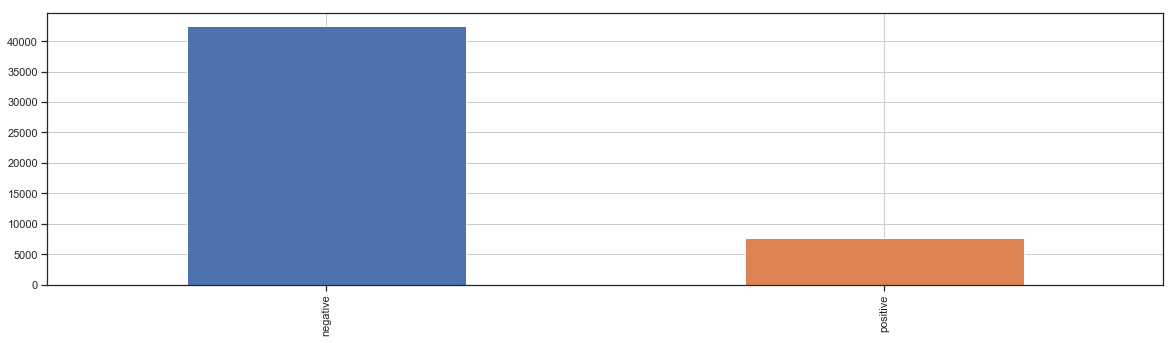

TypeofposART


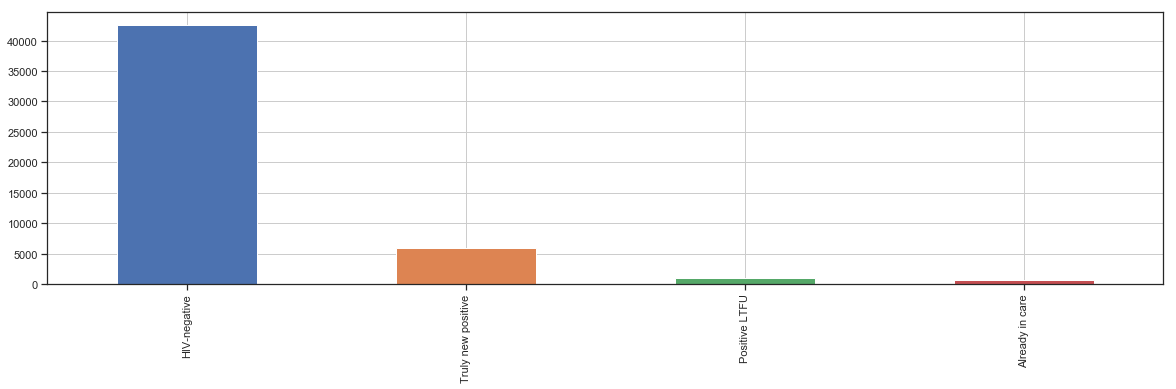

InCouponsTypes


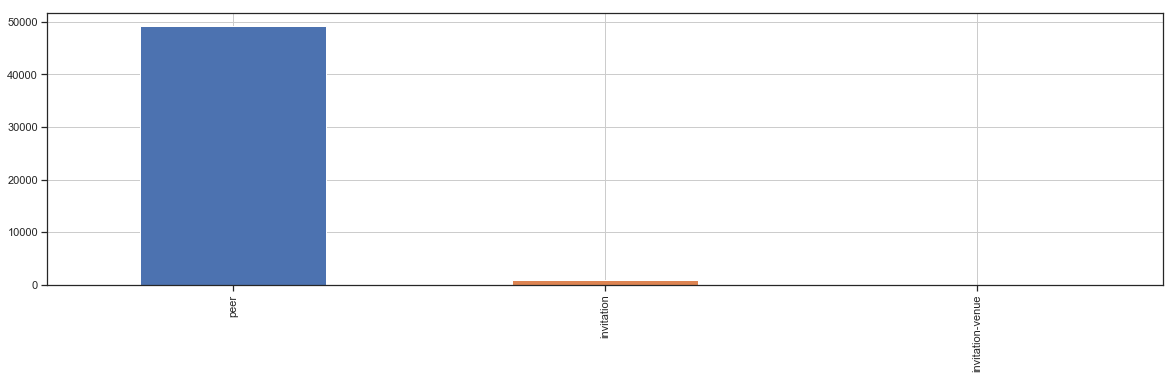

NETnewPos_S1


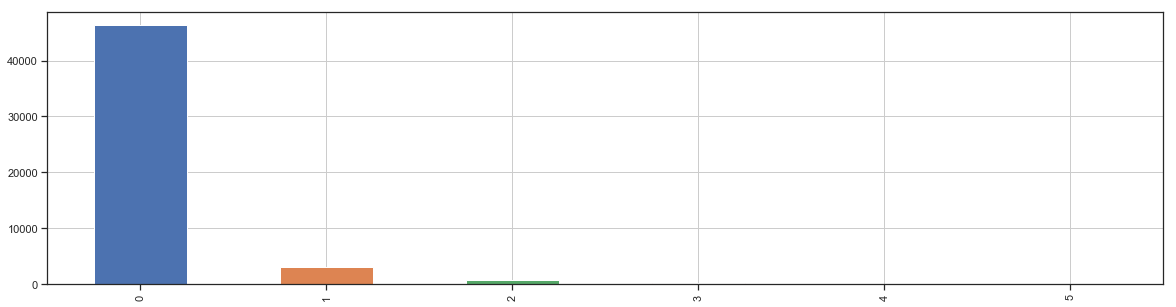

In [6]:
features_not_to_visualize = [ 'UniqueID'
                             , 'Outcoupons1'
                             , 'Outcoupons2'
                             , 'Outcoupons2'
                             , 'Outcoupons3'
                             , 'Outcoupons4'
                             , 'Outcoupons5'
                             , 'Outcoupons6'
                             , 'Outcoupons7'
                             , 'Outcoupons8'
                             , 'couponsno'
                             , 'Incoupons'
                             , 'AIDSregistrationdate'
                             , 'ARTdate'
                             , 'NETTOT_S1'
                             , 'NETPOS_S1'
                             , 'NETnoART_S1']

for i in data.columns:
    if i not in features_not_to_visualize+['RecordDate']:
        print(i)
        data[i].value_counts().plot(kind='bar',grid=True, figsize=[20,5])
        plt.show()

## Define the prediction problem

**Our study is retrospective. We have collected data to certaine period.
The problem is diagnostic (classification). For that perpose We are using  Decision Trees, K-nearest neighbors and  Naive Bayes maching learaning algoritm to predict to come HIV positives or not.
The form of the prediction model is classification and the target variable is binary.**

The methodology that I’ll follow when building the classifiers goes as follows:

Standardizing the data to speed up convergence and make all features on the same scale.
Finding of the classifier (estimator) we want to use to fit the model.
To tune hyperparameters using 10-folds cross validation. We can use RandomizedSearchCV which is faster then GridSearchCV and may outperform GridSearchCV especially if we have more than two hyperparameters and the range for each one is very big.
Plot both confusion matrix and ROC curve for the best estimator using test data.
Repeat for  K-Nearest Neighbors and  Naive Bayes.
Next, pick the classifier that has the highest cross validation f1 score.

### Target for prediction: NETnewPos_S1 > 1 vs. NETnewPos_S1=0
 
### Lets focus on classification problem: "is there a recruitment of new HIV case in one step vs. not"

In [7]:
#NETnewPos_S1 - Total number of recruited HIV+ peers who have never been registered in AIDS center - calculated

data['NETnewPos_S1_Target'] = data['NETnewPos_S1']
data['NETnewPos_S1_Target'][data['NETnewPos_S1'] > 0] = 1

NETnewPos_S1_Target


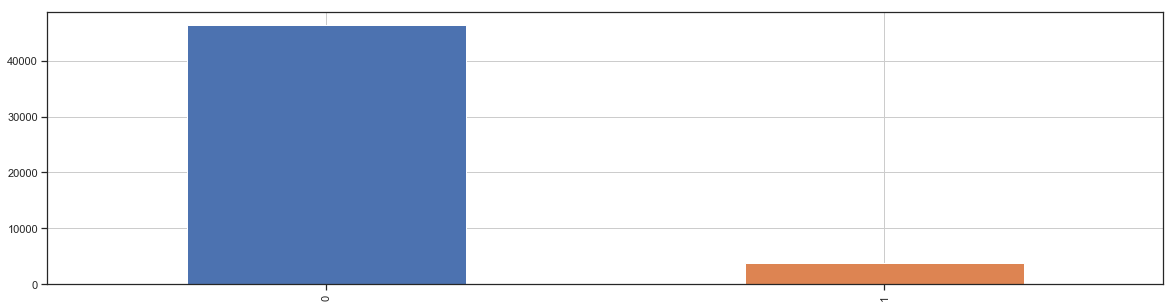

In [12]:
print('NETnewPos_S1_Target')
data['NETnewPos_S1_Target'].value_counts().plot(kind='bar',grid=True, figsize=[20,5])
plt.show()

**The sample is not balanced - resulted in the first step is much smaller**

### We have an imbalanced dataset.
As a result, when we fit classifiers on such datasets, we should use metrics other than accuracy when comparing models such as:
- F1 Score
- AUC (Area under ROC Curve)
Moreover, class imbalance influences a learning algorithm during training by making the decision rule biased towards the majority class by implicitly learning a model that optimized the predictions based on the majority class in the dataset.

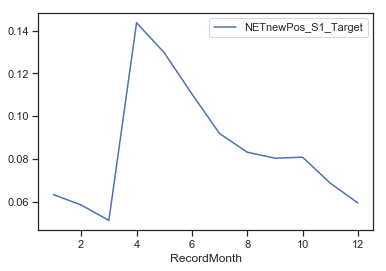

In [8]:
data['RecordMonth'] = data['RecordDate'].dt.month
data[['NETnewPos_S1_Target', 'RecordMonth']].groupby('RecordMonth').mean().plot()

**There are shown certain seasonality. In the period of April to August the most fruit period to register a new person. During the December to March, we saw descending. But to do presumptions we have to collect data for more years and investigate other reasons.**

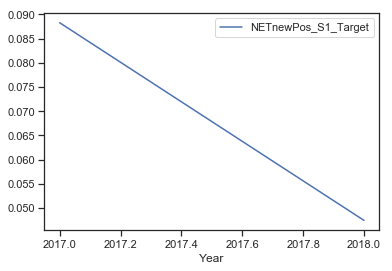

In [14]:
data[['NETnewPos_S1_Target', 'Year']].groupby('Year').mean().plot()

### Feature Type Grouping

Here the following type of features are defined:
1. Features that should not take part in modeling such as dates and IDs
2. Targets and Targets based features

**"Outcoupons" we exclude as we will make optimization in the future. Good practice to exclude targeted variables from dataset.**

In [9]:
features_to_drop = [ 'RecordMonth'
                             , 'Outcoupons1'
                             , 'Outcoupons2'
                             , 'Outcoupons2'
                             , 'Outcoupons3'
                             , 'Outcoupons4'
                             , 'Outcoupons5'
                             , 'Outcoupons6'
                             , 'Outcoupons7'
                             , 'Outcoupons8'
                             , 'couponsno'
                             , 'Incoupons'
                             , 'AIDSregistrationdate'
                             , 'NETTOT_S1'
                             , 'NETPOS_S1'
                             , 'NETnoART_S1'
                             , 'couponsno'
                             , 'Year']
target_based_features = ['NETTOT_S1'
                                     , 'NETPOS_S1'
                                     , 'NETnoART_S1'
                                     , 'NETnewPos_S1']
target = ['NETnewPos_S1_Target']

### Feature Generation

In [10]:
columns_to_dummies = [i for i in data.columns if i not in features_to_drop+
                      target_based_features+target+['UniqueID']+['RecordDate']+
                      ['Age']+['Yearsinjecting']+['Sexpartners']+['ARTdate']]

In [17]:
data[columns_to_dummies].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50196 entries, 0 to 50195
Data columns (total 12 columns):
VisitsCount       50196 non-null int64
Sex               50196 non-null object
Region            50196 non-null object
HarmReduction     50196 non-null object
MaritalStatus     50196 non-null object
PatientZpt        50196 non-null object
Imprisonment      50196 non-null object
RiskGroup         50196 non-null object
Relation          50196 non-null object
OCFtest.result    50196 non-null object
TypeofposART      50196 non-null object
InCouponsTypes    50145 non-null object
dtypes: int64(1), object(11)
memory usage: 4.6+ MB


**We have only 'InCouponsTypes' with missed values. And only for that we will do dummy NA=TRUE**

**Distributions of created dummy variables**

In [11]:
# dummy_na=False - unfile InCouponsTypes      
columns_to_dummies = [i for i in data.columns if i not in features_to_drop+
                      target_based_features+['InCouponsTypes']+target+['UniqueID']+
                      ['RecordDate']+['Age']+['Yearsinjecting']+['Sexpartners']+['ARTdate']]
data_teh = pd.get_dummies(data, dummy_na=False, columns=columns_to_dummies)


In [12]:
# dummy_na=True - InCouponsTypes      
data_teh = pd.get_dummies(data_teh, dummy_na=True, columns=['InCouponsTypes'])

In [13]:
#Excluding one of the generated features from binary features, as they are 100% correlated
binary_to_drop = ['HarmReduction_no', 'PatientZpt_no', 'OCFtest.result_negative','TypeofposART_HIV-negative']
data_teh = data_teh.drop(binary_to_drop, axis=1)

**Brief look at the data**

In [14]:
data_teh = data_teh.drop(features_to_drop+target_based_features, axis=1)
print(data_teh.mean().to_string())

Age                                35.194318
Yearsinjecting                      5.216551
Sexpartners                         0.799307
NETnewPos_S1_Target                 0.077078
VisitsCount_1                       0.919356
VisitsCount_2                       0.063969
VisitsCount_3                       0.013308
VisitsCount_4                       0.002630
VisitsCount_5                       0.000498
VisitsCount_6                       0.000239
Sex_F                               0.233724
Sex_M                               0.766216
Sex_T                               0.000060
Region_cherkasy                     0.047613
Region_chernigivska                 0.013886
Region_dnipropetrovska              0.362957
Region_donetska                     0.021157
Region_khersonska                   0.004522
Region_kyiv                         0.277950
Region_kyivska                      0.073113
Region_kyrovograd                   0.014244
Region_mykolaivska                  0.028887
Region_ode

In [22]:
data_teh.iloc[:,2:6].describe(include='all')

,Age,Yearsinjecting,Sexpartners,ARTdate
count,50196.000000,50196.000000,50196.000000,754
unique,NaN,NaN,NaN,550
top,NaN,NaN,NaN,2014-01-01 00:00:00
freq,NaN,NaN,NaN,15
first,NaN,NaN,NaN,1995-01-01 00:00:00
last,NaN,NaN,NaN,2018-11-26 00:00:00
mean,35.194318,5.216551,0.799307,NaN
std,8.031955,7.071910,1.644075,NaN
min,14.000000,0.000000,0.000000,NaN
25%,30.000000,0.000000,0.000000,NaN


#### to prepare our features for ML we will do binary values.

**We see that mediana for 50% of individuals are 34 year old. We could do two groups of ages.**

**We see that we have individuals who don't injecting. We could do two groups of 'Yearsinjecting'.**

**We see the half of individuals didn't have sexual partners in the past month or just did't tell about it and mediana of 75% is 1. We could do two groups as well.**

**We see individuals who obtained ATR - 754. We could separate them.**

In [23]:
data_teh[data_teh.Age <= 34]['UniqueID'].count()

25186

In [15]:
data_teh['Age_to_34'] = np.where(data_teh.Age <= 34, 1, 0)

In [16]:
data_teh[data_teh.Yearsinjecting == 0]['UniqueID'].count()

25081

In [17]:
data_teh['Injecting'] = np.where(data_teh.Yearsinjecting != 0, 1, 0)

In [18]:
data_teh['NoSex'] = np.where(data_teh.Sexpartners != 0, 1, 0)

In [19]:
data_teh['ART'] = np.where(data_teh.ARTdate.isna() == True, 1, 0)

In [29]:
data_teh.columns

Index(['RecordDate', 'UniqueID', 'Age', 'Yearsinjecting', 'Sexpartners',
       'ARTdate', 'NETnewPos_S1_Target', 'VisitsCount_1', 'VisitsCount_2',
       'VisitsCount_3', 'VisitsCount_4', 'VisitsCount_5', 'VisitsCount_6',
       'Sex_F', 'Sex_M', 'Sex_T', 'Region_cherkasy', 'Region_chernigivska',
       'Region_dnipropetrovska', 'Region_donetska', 'Region_khersonska',
       'Region_kyiv', 'Region_kyivska', 'Region_kyrovograd',
       'Region_mykolaivska', 'Region_odeska', 'Region_poltavska',
       'Region_zaporizhzhia', 'HarmReduction_yes', 'MaritalStatus_divorced',
       'MaritalStatus_married', 'MaritalStatus_single',
       'MaritalStatus_unknown', 'MaritalStatus_widow', 'PatientZpt_yes',
       'Imprisonment_no', 'Imprisonment_unknown', 'Imprisonment_yes',
       'RiskGroup_MSM', 'RiskGroup_Other', 'RiskGroup_PWID',
       'RiskGroup_PWID sexual partner', 'Relation_Acquaintance',
       'Relation_Drug use partner', 'Relation_Friend',
       'Relation_Never met before', 'Relatio

In [20]:
Colums_to_drop = ['RecordDate', 'UniqueID', 'Age', 'Yearsinjecting', 'Sexpartners', 'ARTdate']

### Outcome Period

### I tried to calculate quantities of days when a new person came since a coupon is given out

In [31]:
data_ = data.copy()
for i in range(1,9):
    i_str = str(i)
    globals()['df' + i_str] = pd.merge(data[(pd.isna(data.get('Outcoupons'+i_str)) == False)][['Outcoupons'+i_str, 'RecordDate']], data[['Incoupons', 'RecordDate']], how='inner', left_on='Outcoupons'+i_str, right_on='Incoupons',suffixes=('', '_'+i_str))
    globals()['df' + i_str]['days_'+i_str] = globals()['df' + i_str].get('RecordDate_'+i_str) - globals()['df' + i_str].RecordDate
    data_ = pd.merge(data_, globals()['df' + i_str][['days_'+i_str,'Outcoupons'+i_str]], on='Outcoupons'+i_str, how='left')


In [32]:
data_.iloc[:,-8:].describe(include='all')

,days_1,days_2,days_3,days_4,days_5,days_6,days_7,days_8
count,14148,14150,13974,2797,1598,390,174,6
mean,14 days 17:59:29.465648,14 days 15:42:39.943462,14 days 11:07:45.264061,13 days 02:26:43.718269,14 days 08:39:56.996245,17 days 09:17:32.307692,13 days 21:31:02.068965,15 days 20:00:00
std,25 days 02:27:56.466002,24 days 16:46:47.038159,24 days 10:07:20.753689,18 days 14:27:20.845782,19 days 18:03:32.073299,22 days 03:58:05.086616,18 days 23:33:04.467799,20 days 14:59:09.817475
min,-27 days +00:00:00,-27 days +00:00:00,-27 days +00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,1 days 00:00:00,1 days 00:00:00,1 days 00:00:00,1 days 00:00:00,2 days 00:00:00,3 days 00:00:00,3 days 00:00:00,3 days 06:00:00
50%,6 days 00:00:00,6 days 00:00:00,6 days 00:00:00,6 days 00:00:00,7 days 00:00:00,8 days 00:00:00,7 days 00:00:00,11 days 12:00:00
75%,17 days 00:00:00,17 days 00:00:00,16 days 00:00:00,16 days 00:00:00,19 days 00:00:00,21 days 00:00:00,16 days 00:00:00,14 days 12:00:00
max,430 days 00:00:00,420 days 00:00:00,373 days 00:00:00,148 days 00:00:00,143 days 00:00:00,127 days 00:00:00,119 days 00:00:00,56 days 00:00:00


In [34]:
data_[((data_.days_1.isnull())&(data_.days_2.isnull())&(data_.days_3.isnull())
      &(data_.days_4.isnull())&(data_.days_5.isnull())&(data_.days_6.isnull())
      &(data_.days_7.isnull())&(data_.days_8.isnull()))].UniqueID.count()

34175

In [35]:
data.UniqueID.count()

50196

In [36]:
34175/50196

0.6808311419236592

**for 32% of all persons were lost information about time to come.**

### We can define our outcome period from the previous calculation and take the average value as 14 days.

In [21]:
testing_period = 60
outcome_period = 14

## Building  the predictive model and performance 

We will plot the receiver operating characteristic curve (ROC) and will obtain an evaluation metric - area under the ROC curve (AUC). We determine a threshold of AUC as:
- < 60 % failed
- 60 to 70 weak
- 70 to 80 good
- 80 to 90 assumption of truth

### Random forest classifier
Train and test sample construction

In [20]:
data_teh['RecordDate'].max()

Timestamp('2018-03-30 00:00:00')

In [22]:
cutoff_date_train = data_teh['RecordDate'].max() - np.timedelta64(outcome_period + testing_period, 'D')
train_sample = data_teh[data_teh['RecordDate'] < cutoff_date_train]
cutoff_date_test = data_teh['RecordDate'].max() - np.timedelta64(testing_period, 'D')
test_sample = data_teh[(data_teh['RecordDate'] >= cutoff_date_train) & (data_teh['RecordDate'] < cutoff_date_test)]

In [40]:
cutoff_date_test

Timestamp('2018-01-29 00:00:00')

In [41]:
cutoff_date_train

Timestamp('2018-01-15 00:00:00')

In [42]:
print('train sample size:', train_sample.shape[0], 'train sample success events:', train_sample[target].sum())
print('test sample size:', test_sample.shape[0], 'test sample success events:', test_sample[target].sum())


train sample size: 38042 train sample success events: NETnewPos_S1_Target    3327
dtype: int64
test sample size: 2211 test sample success events: NETnewPos_S1_Target    100
dtype: int64


In [24]:
x_train = train_sample.drop(Colums_to_drop+target, axis=1)
y_train = train_sample['NETnewPos_S1_Target']

In [44]:
# Build random forest classifier
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500 #Typically Sufficient
                                                 , max_depth=7
                                                 , min_samples_split = 20
                                                 , min_samples_leaf = 10)   

In [45]:
# Import necessary modules
from scipy.stats import randint

# specify parameters and distributions to sample from
hyperparam_grid = {"max_depth": [7, None],
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(2, 10), 
              'max_features': ['auto', 'sqrt'],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=hyperparam_grid,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))


RandomizedSearchCV took 1552.48 seconds for 20 candidates parameter settings.


RandomizedSearchCV took 1586.67 seconds for 20 candidates parameter settings.

In [46]:
print(f"\033[1m\033[0mThe best hyperparameters for data:")
for hyperparam in random_search.best_params_.keys():
    print(hyperparam, ": ", random_search.best_params_[hyperparam])
        
print(f"\033[1m\033[94mBest 10-folds CV f1-score: {random_search.best_score_ * 100:.2f}%.")

The best hyperparameters for data:
bootstrap :  True
criterion :  gini
max_depth :  7
max_features :  sqrt
min_samples_leaf :  9
min_samples_split :  16
Best 10-folds CV f1-score: 91.25%.


**Applying best parameters to our model.**

In [47]:
classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=500
                                                     , max_depth= 7
                                                     , criterion = 'gini'
                                                     , max_features = 'sqrt'
                                                     , min_samples_split = 16
                                                     , min_samples_leaf = 9)

classifier = classifier.fit(x_train, y_train)

One of them is "feature importance". It shows "how important" is the feature to the model. It takes into account # of times feature is appearing in ensemble (more often -- more important) and in which level of the tree (higher level -- more important).
Here is a list of important features of the model: 

In [48]:
classifier_feature_importances = pd.DataFrame(columns = ['FEATURE', 'IMPORTANCE'])
classifier_feature_importances['FEATURE'] = x_train.columns
classifier_feature_importances['IMPORTANCE'] = classifier.feature_importances_ 
classifier_feature_importances = classifier_feature_importances.sort_values(by = 'IMPORTANCE', ascending=False)
print(classifier_feature_importances)

                            FEATURE  IMPORTANCE
45  TypeofposART_Truly new positive    0.356084
42          OCFtest.result_positive    0.347950
11           Region_dnipropetrovska    0.047100
35            Relation_Acquaintance    0.040039
50                        Age_to_34    0.013745
44       TypeofposART_Positive LTFU    0.013341
14                      Region_kyiv    0.013323
36        Relation_Drug use partner    0.013071
18                    Region_odeska    0.012083
29             Imprisonment_unknown    0.010607
52                            NoSex    0.009256
28                  Imprisonment_no    0.009134
46        InCouponsTypes_invitation    0.008720
51                        Injecting    0.006594
48              InCouponsTypes_peer    0.006512
21                HarmReduction_yes    0.006366
53                              ART    0.006277
41                 Relation_Unknown    0.005716
43     TypeofposART_Already in care    0.005498
30                 Imprisonment_yes    0

Features may interact in a very unexpected ways in random forest breaking expected trends and thus forming combinations that provide great predictability. It is however useful to track high level trends of important features.

Let's delete three last features and will train the model again. 

In [49]:
x_train = train_sample.drop(Colums_to_drop+target+['Sex_T', 'InCouponsTypes_invitation-venue','VisitsCount_6'], axis=1)

classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=500
                                                     , max_depth= 7
                                                     , criterion = 'gini'
                                                     , max_features = 'sqrt'
                                                     , min_samples_split = 16
                                                     , min_samples_leaf = 9)

classifier = classifier.fit(x_train, y_train)


In [50]:
classifier_feature_importances = pd.DataFrame(columns = ['FEATURE', 'IMPORTANCE'])
classifier_feature_importances['FEATURE'] = x_train.columns
classifier_feature_importances['IMPORTANCE'] = classifier.feature_importances_ 
classifier_feature_importances = classifier_feature_importances.sort_values(by = 'IMPORTANCE', ascending=False)
print(classifier_feature_importances)

                            FEATURE  IMPORTANCE
40          OCFtest.result_positive    0.356597
43  TypeofposART_Truly new positive    0.346123
9            Region_dnipropetrovska    0.045286
33            Relation_Acquaintance    0.039526
16                    Region_odeska    0.014408
12                      Region_kyiv    0.014321
34        Relation_Drug use partner    0.014292
47                        Age_to_34    0.014083
42       TypeofposART_Positive LTFU    0.013043
27             Imprisonment_unknown    0.011660
26                  Imprisonment_no    0.008910
49                            NoSex    0.008185
44        InCouponsTypes_invitation    0.007439
45              InCouponsTypes_peer    0.006495
19                HarmReduction_yes    0.006490
48                        Injecting    0.006214
50                              ART    0.006040
41     TypeofposART_Already in care    0.005975
39                 Relation_Unknown    0.005180
13                   Region_kyivska    0

#### Performance Validation Tools

The following functions are model validation tools. They give a list of metrics and charts that let researcher decide if the binary classification model is performing well.
Here is a description one key ones:
1. Accuracy. (True Positives + True Negatives)/(Sample Size). The higher the accuracy the better is the estimator
2. Precision. (True Positives)/(True Positives + False Positives). This metric shows you how accurate is the estimator
3. Recall. (True Positives)/(Total positives). This metric shows you how "full" is the estimator
4. f1-score. 2 * (precision * recall) / (precision + recall). The higher f1-score is the better is the estimator. This is a useful metric for imbalanced samples such as ours. Think of this: in case 90% of cases are false one achieves accuracy of 90% just by labeling whole sample as false. f1-score however shall be zero for such "lazy" estimation
5. AUC. Area under receiver operator curve. The higher the AUC is the better is the estimator. This is an extremely useful metric for binary classificators. In case (such as ours) classificator provides a probability of an event, AUC reflects discrimination power of an estimator. One may think of it as probability that classifier will rank randomly chosen positive higher than randomly chosen negative.  

#### Performance on Train Sample

In [51]:
y_true = y_train
y_pred = classifier.predict(x_train)
y_pred_proba = classifier.predict_proba(x_train)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba

One can see that classification report is really bad. Model does not make any adding value and gets its 91% accuracy simply by labeling all the records as "non-positives".
This is why it is happening: model is actually giving probability estimation, not a zero/one prediction. Then if probability estimation is greater than 50% model labels data point as "positive". (In practice researchers may put different break points other than 50% in order to achieve desired precision/recall balance.) Developed model does not give any record 50%+ probability of being positive. But AUC statistics is really good. This means that that model is actually good in discriminating positives with its probability estimation scores. 

In [52]:
classifier_performance(classifier, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95     34715
          1       0.00      0.00      0.00      3327

avg / total       0.83      0.91      0.87     38042

Confusion Matrix:
[[34715     0]
 [ 3327     0]]
Accuracy: 0.9125440302823196
AUC: 0.7581773236064842


C:\Anaconda_Python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 #### Accuracy: 

Model Accuracy: 91.25%
 
Cohen's Kappa: 0.00%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.91      1.00      0.95     34715
          1       0.00      0.00      0.00      3327

avg / total       0.83      0.91      0.87     38042

 #### Confusion Matrix 


C:\Anaconda_Python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


          Pred = 1  Pred = 0
Obsv = 1         0      3327
Obsv = 0         0     34715
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


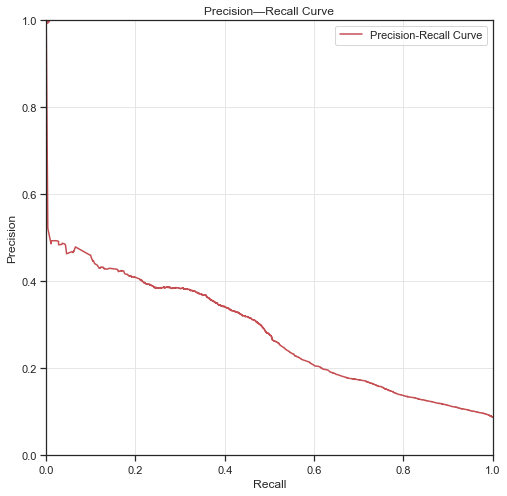


Area Under PR Curve (AP): 0.28
 ### I.b. Precision Recall and Queue plot


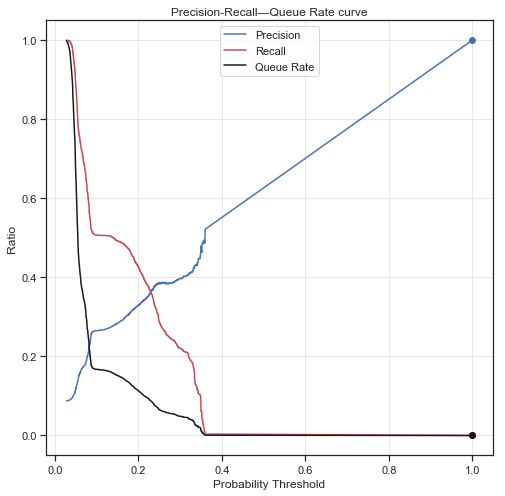

 # II. ROC
 ROC Plot


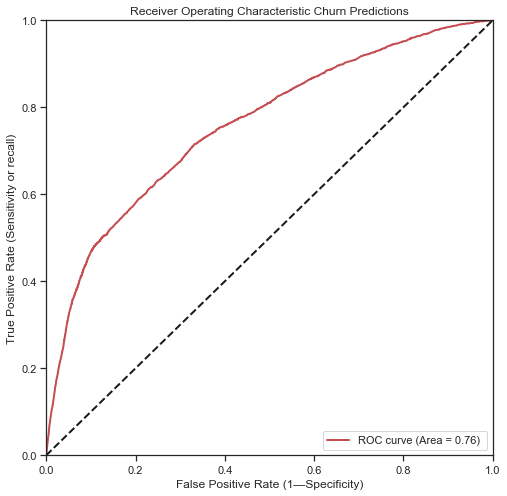

 # III. Lift Chart
 #### Group by predicted probability deciles
Total positive observation: 3327
Total observations: 38042
Observed Positive Class Rate: 8.75 %

Decile Limits:
[(0.36022748548540395, 0.2147285076324277)]
 ### III.a. Observed Responce Rate


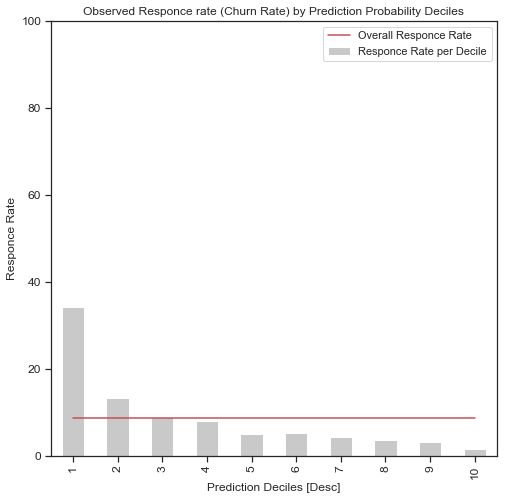

 ### III.b. Lift Chart



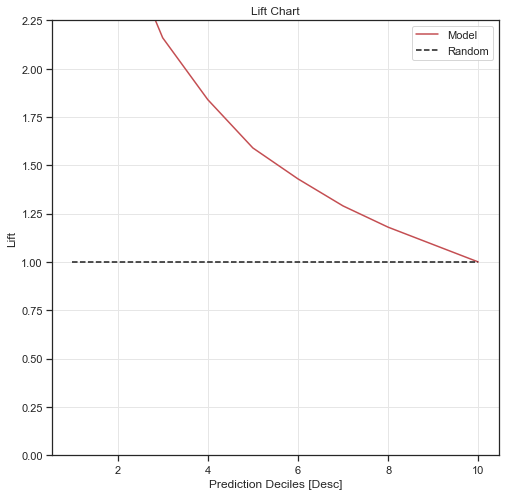

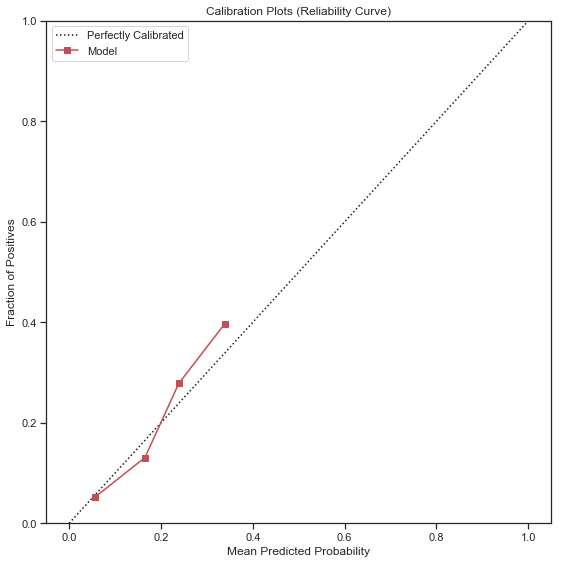

In [53]:
binary_classification_validation(df=validation_dataframe)

A precision-recall curve shows the relationship between precision (= positive predictive value) and recall (= sensitivity) for every possible cut-off. The PRC is a graph with: 

• The x-axis showing recall (= sensitivity = TP / (TP + FN)) 
• The y-axis showing precision (= positive predictive value = TP / (TP + FP))

Precision-recall curves are often zigzag curves frequently going up and down. Therefore, precision-recall curves tend to cross each other much more frequently than ROC curves. This can make comparisons between curves challenging. However, curves close to the PRC for a perfect test (see later) have a better performance level than the ones closes to the baseline. In other words, a curve above the other curve has a better performance level.

The main difference between ROC curves and precision-recall curves is that the number of true-negative results is not used for making a PRC. 

#### Performance on Test Sample

In [54]:
x = test_sample.drop(Colums_to_drop+target+['Sex_T', 'InCouponsTypes_invitation-venue','VisitsCount_6'], axis=1)
y = test_sample['NETnewPos_S1_Target']

y_true = y
y_pred = classifier.predict(x)
y_pred_proba = classifier.predict_proba(x)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba

In [55]:
classifier_performance(classifier, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      2111
          1       0.00      0.00      0.00       100

avg / total       0.91      0.95      0.93      2211

Confusion Matrix:
[[2111    0]
 [ 100    0]]
Accuracy: 0.9547715965626413
AUC: 0.6878019895783989


C:\Anaconda_Python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 #### Accuracy: 

Model Accuracy: 95.48%
 
Cohen's Kappa: 0.00%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      2111
          1       0.00      0.00      0.00       100

avg / total       0.91      0.95      0.93      2211

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1         0       100
Obsv = 0         0      2111
 # I. Precision Recall curve
 Calculations


C:\Anaconda_Python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


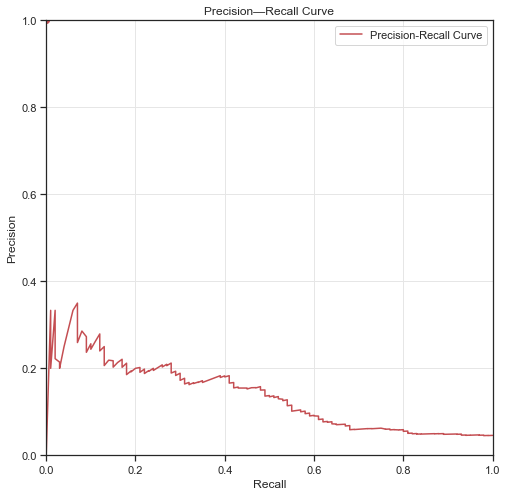


Area Under PR Curve (AP): 0.14
 ### I.b. Precision Recall and Queue plot


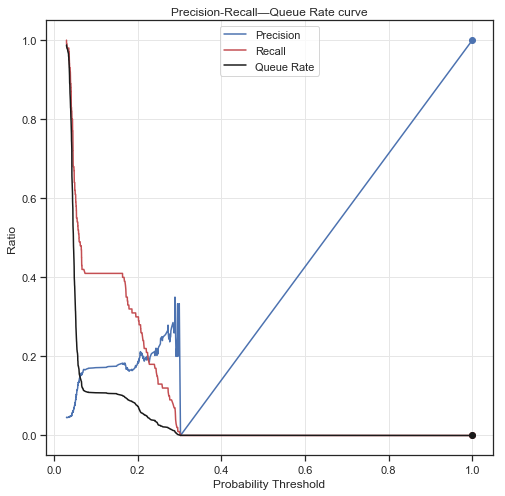

 # II. ROC
 ROC Plot


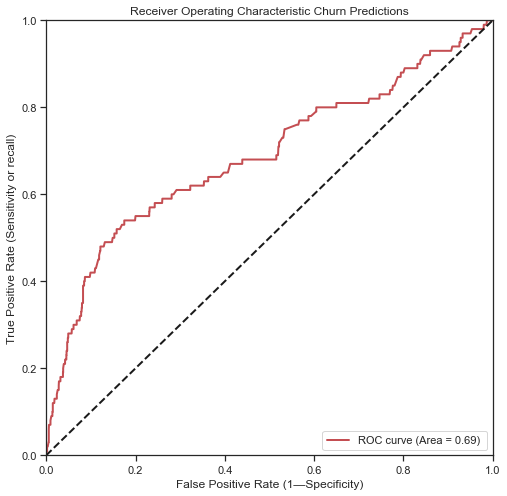

 # III. Lift Chart
 #### Group by predicted probability deciles
Total positive observation: 100
Total observations: 2211
Observed Positive Class Rate: 4.52 %

Decile Limits:
[(0.30251501551544013, 0.1641402080424589)]
 ### III.a. Observed Responce Rate


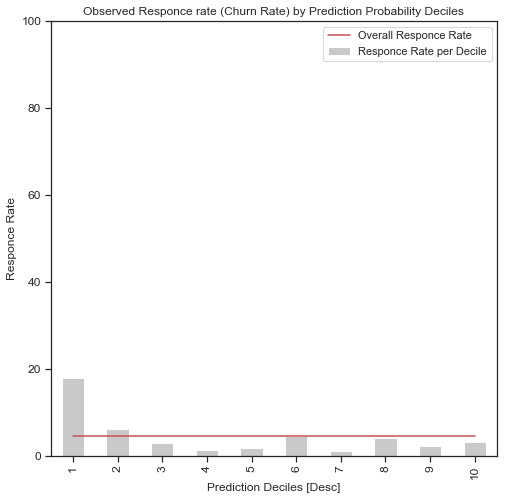

 ### III.b. Lift Chart



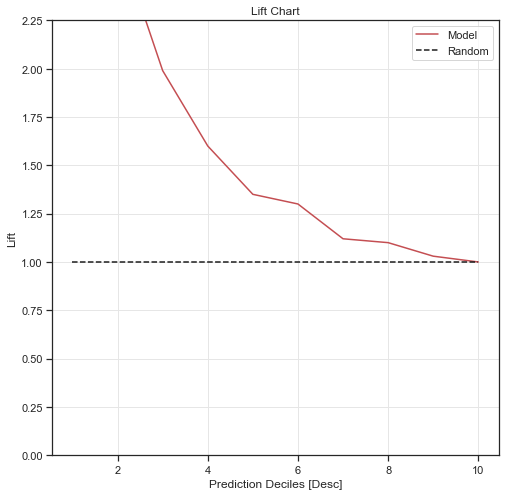

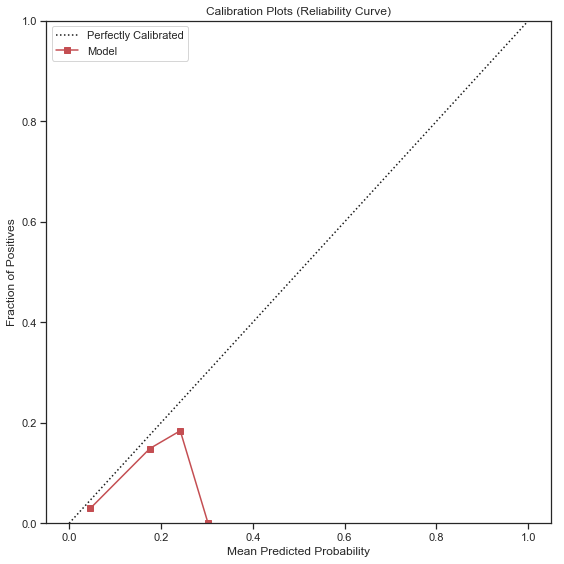

In [56]:
binary_classification_validation(df=validation_dataframe)

## Modeling with Sample Weights reveals better result but...

Train and test sample construction

In [57]:
cutoff_date_train = data_teh['RecordDate'].max() - np.timedelta64(outcome_period + testing_period, 'D')
train_sample = data_teh[data_teh['RecordDate'] < cutoff_date_train]
cutoff_date_test = data_teh['RecordDate'].max() - np.timedelta64(testing_period, 'D')
test_sample = data_teh[(data_teh['RecordDate'] >= cutoff_date_train) & (data_teh['RecordDate'] < cutoff_date_test)]

In [58]:
print('train sample size:', train_sample.shape[0], 'train sample success events:', train_sample[target].sum())
print('test sample size:', test_sample.shape[0], 'test sample success events:', test_sample[target].sum())


train sample size: 38042 train sample success events: NETnewPos_S1_Target    3327
dtype: int64
test sample size: 2211 test sample success events: NETnewPos_S1_Target    100
dtype: int64


While modeling non stationary processes some of the dependencies may be lost or changed. Not all useful information is lost yet older data usually s not that useful as new data. One may apply "sample weights" to train sample based on the report date of an instance making some periods more important to the model (during training process)  

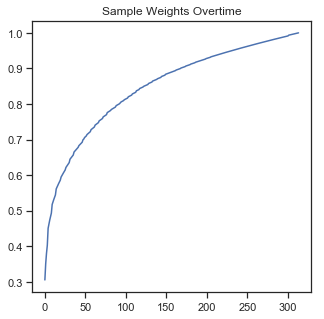

In [24]:
p = 0.2
data_sample_weight = (train_sample['RecordDate']-train_sample['RecordDate'].min()) + np.timedelta64(1,'D')
data_sample_weight = data_sample_weight/data_sample_weight.max()
data_sample_weight = data_sample_weight ** p
plt.figure(figsize = [5,5])
plt.title('Sample Weights Overtime')
plt.plot(np.sort(data_sample_weight.unique()))
plt.show()

Model training

In [26]:
x_train = train_sample.drop(Colums_to_drop+target+['Sex_T', 'InCouponsTypes_invitation-venue','VisitsCount_6'], axis=1)
y_train = train_sample['NETnewPos_S1_Target']

The implementation of the different class weights.

Train Random Forest While Balancing Classes


In [61]:
train_sample.groupby('NETnewPos_S1_Target')['NETnewPos_S1_Target'].count()

NETnewPos_S1_Target
0    34715
1     3327
Name: NETnewPos_S1_Target, dtype: int64

In [25]:
class_weight = dict({0:0.55, 1:5.72})

In [63]:
classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=500
                                                     , class_weight=class_weight
                                                     , max_depth= 7
                                                     , criterion = 'gini'
                                                     , max_features = 'sqrt'
                                                     , min_samples_split = 16
                                                     , min_samples_leaf = 9)

classifier = classifier.fit(x_train, y_train, sample_weight = data_sample_weight)

It is useful to understand how exactly model works. Of course when it comes to complex black boxes such as deep neural nets of ensemble models it is impossible to understand fully what is happening under the hood. However there are ways to get some insights.
One of them is "feature importance". It shows "how important" is the feature to the model. It takes into account # of times feature is appearing in ensemble (more often -- more important) and in which level of the tree (higher level -- more important).
Here is a list of important features of the model: 

In [64]:
classifier_feature_importances = pd.DataFrame(columns = ['FEATURE', 'IMPORTANCE'])
classifier_feature_importances['FEATURE'] = x_train.columns
classifier_feature_importances['IMPORTANCE'] = classifier.feature_importances_ 
classifier_feature_importances = classifier_feature_importances.sort_values(by = 'IMPORTANCE', ascending=False)
print(classifier_feature_importances)

                            FEATURE  IMPORTANCE
40          OCFtest.result_positive    0.379763
43  TypeofposART_Truly new positive    0.286234
9            Region_dnipropetrovska    0.046458
33            Relation_Acquaintance    0.032474
47                        Age_to_34    0.018814
16                    Region_odeska    0.017968
26                  Imprisonment_no    0.016749
7                   Region_cherkasy    0.015042
42       TypeofposART_Positive LTFU    0.014618
12                      Region_kyiv    0.013882
27             Imprisonment_unknown    0.013266
34        Relation_Drug use partner    0.011647
49                            NoSex    0.010364
50                              ART    0.007422
44        InCouponsTypes_invitation    0.007248
41     TypeofposART_Already in care    0.006546
45              InCouponsTypes_peer    0.006396
31                   RiskGroup_PWID    0.005875
48                        Injecting    0.005766
35                  Relation_Friend    0

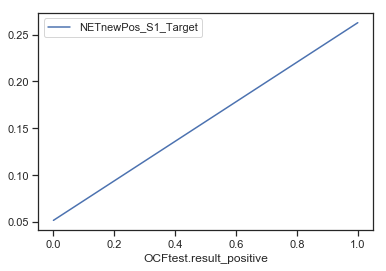

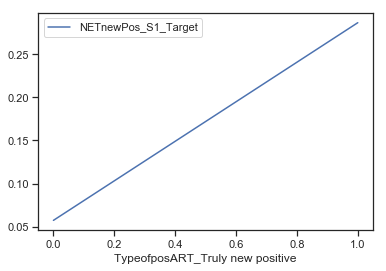

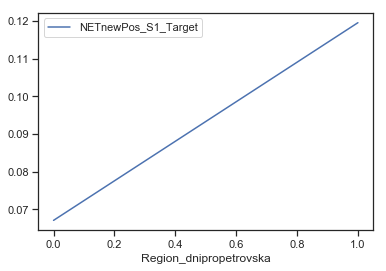

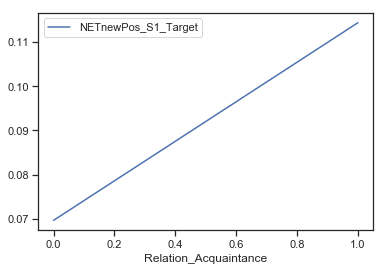

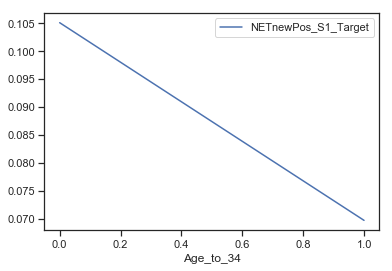

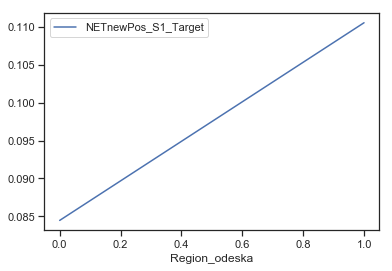

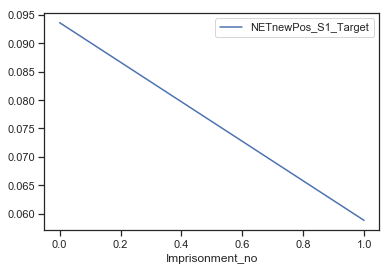

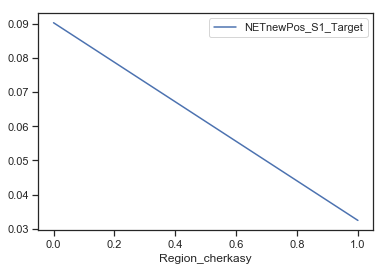

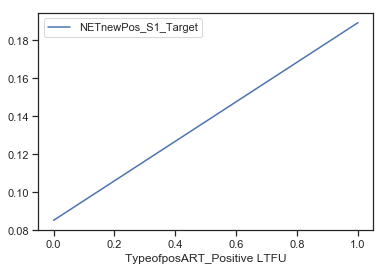

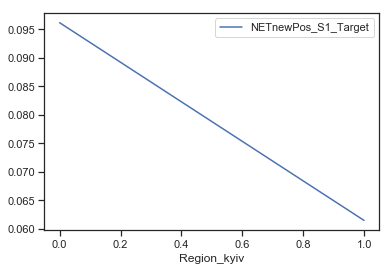

In [65]:
features = classifier_feature_importances[:10]
for f in features['FEATURE'][:10].values:
    train_sample[[f, 'NETnewPos_S1_Target']].groupby(f).mean().plot()

There are shown ten most important features. We see  **'OCFtest.result_positive'**, **'TypeofposART_Truly new positive'**, 
**'Region_dnipropetrovska'**, **'Relation_Acquaintance'**, **'Region_odeska'**, **'TypeofposART_Positive'**, have positive influence and **'Age_to_34'**, **'Imprisonment_no'**, **'Region_kyiv'**, **'Region_cherkasy'** negative.

We can assume
- that a person who has positive **"HIV rapid test result"** or **'Truly new positive' "Type of HIV+ client by AIDS center registration and ART status"**  invite more potential HIV-positives which have never been in the centre
- individuals from **'Region_dnipropetrovska'** and **'Region_odeska'** will bring new requared person to the centre with higther probability than from **'Region_kyiv'** or **'Region_cherkasy'**
- individuals **older 34 years** invites more new HIV-positives which have never been in the centre
- individuals which has answered to the question "History of incarceration" - **"Imprisonment_no"** will bring new requared person with lower probability
- individuals which has been in relation to recruiter **'Relation_Acquaintance'** will bring new requared person to the centre with higther probability

### Model testing

#### Performance on Train Sample

In [66]:
y_true = y_train
y_pred = classifier.predict(x_train)
y_pred_proba = classifier.predict_proba(x_train)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba


In [67]:
classifier_performance(classifier, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.87      0.91     34715
          1       0.27      0.51      0.35      3327

avg / total       0.89      0.84      0.86     38042

Confusion Matrix:
[[30145  4570]
 [ 1643  1684]]
Accuracy: 0.8366805110141423
AUC: 0.7597366308098306


 #### Accuracy: 

Model Accuracy: 83.67%
 
Cohen's Kappa: 26.79%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.95      0.87      0.91     34715
          1       0.27      0.51      0.35      3327

avg / total       0.89      0.84      0.86     38042

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1      1684      1643
Obsv = 0      4570     30145
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


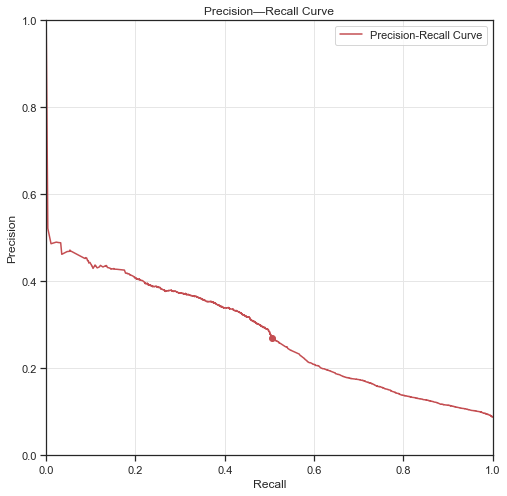


Area Under PR Curve (AP): 0.28
 ### I.b. Precision Recall and Queue plot


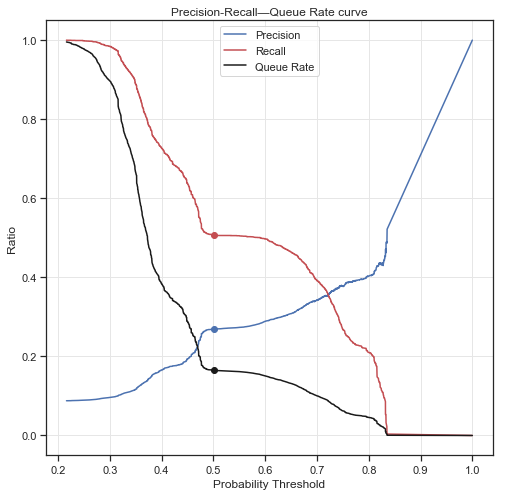

 # II. ROC
 ROC Plot


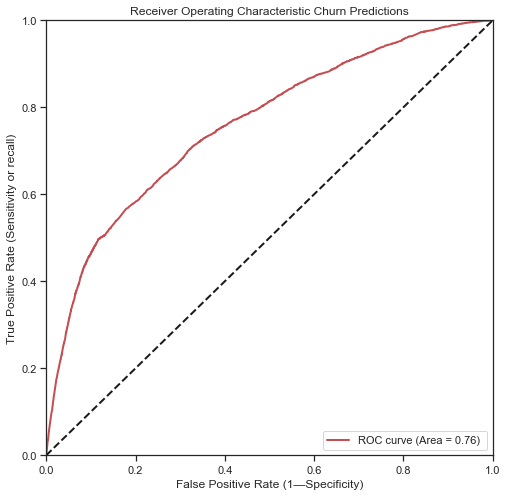

 # III. Lift Chart
 #### Group by predicted probability deciles
Total positive observation: 3327
Total observations: 38042
Observed Positive Class Rate: 8.75 %

Decile Limits:
[(0.8354475718922715, 0.7003593393258013)]
 ### III.a. Observed Responce Rate


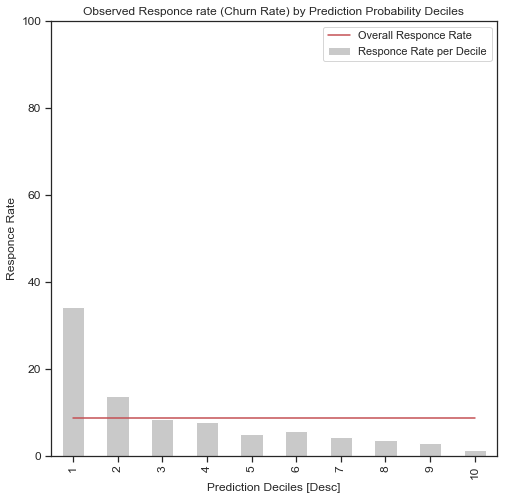

 ### III.b. Lift Chart



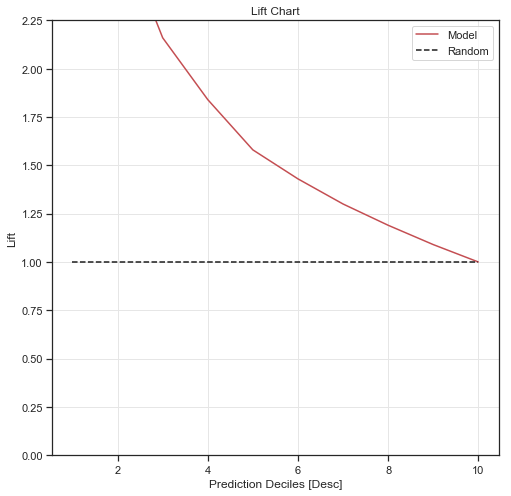

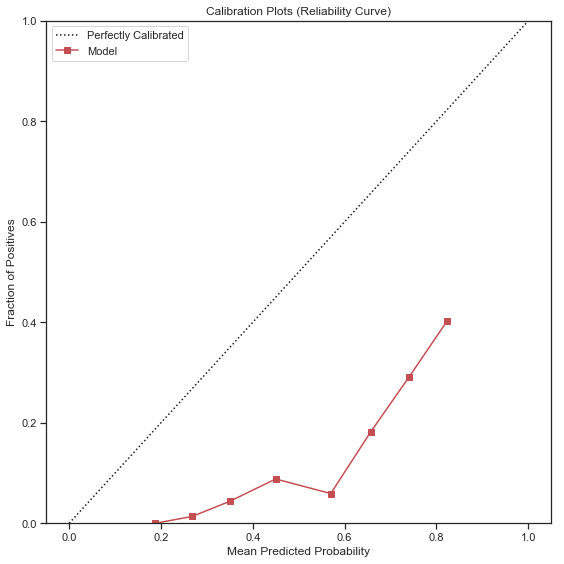

In [68]:
binary_classification_validation(validation_dataframe)

#### Performance on Test Sample

In [69]:
x = test_sample.drop(Colums_to_drop+target+['Sex_T', 'InCouponsTypes_invitation-venue','VisitsCount_6'], axis=1)
y = test_sample['NETnewPos_S1_Target']

y_true = y
y_pred = classifier.predict(x)
y_pred_proba = classifier.predict_proba(x)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba

In [70]:
classifier_performance(classifier, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.91      0.94      2111
          1       0.17      0.41      0.24       100

avg / total       0.93      0.89      0.91      2211

Confusion Matrix:
[[1917  194]
 [  59   41]]
Accuracy: 0.8855721393034826
AUC: 0.687726196115585


 #### Accuracy: 

Model Accuracy: 88.56%
 
Cohen's Kappa: 19.36%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.97      0.91      0.94      2111
          1       0.17      0.41      0.24       100

avg / total       0.93      0.89      0.91      2211

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1        41        59
Obsv = 0       194      1917
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


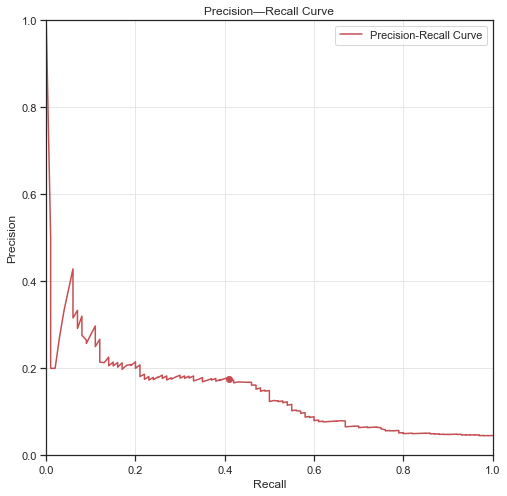


Area Under PR Curve (AP): 0.14
 ### I.b. Precision Recall and Queue plot


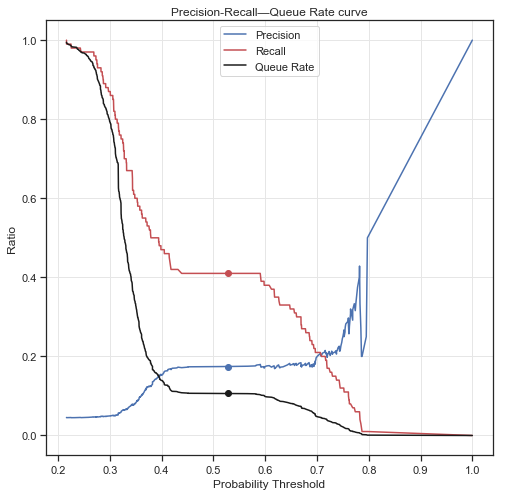

 # II. ROC
 ROC Plot


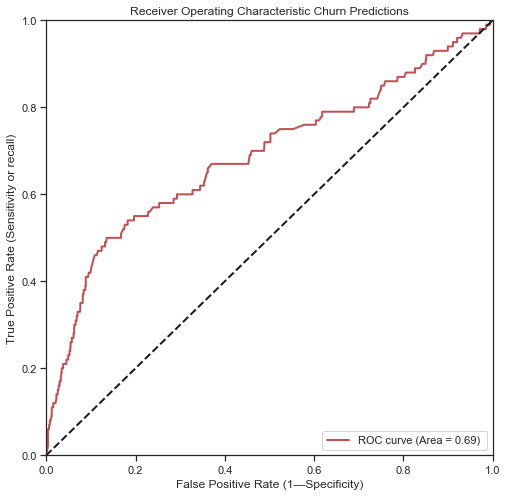

 # III. Lift Chart
 #### Group by predicted probability deciles
Total positive observation: 100
Total observations: 2211
Observed Positive Class Rate: 4.52 %

Decile Limits:
[(0.7974043619123984, 0.5978566929238839)]
 ### III.a. Observed Responce Rate


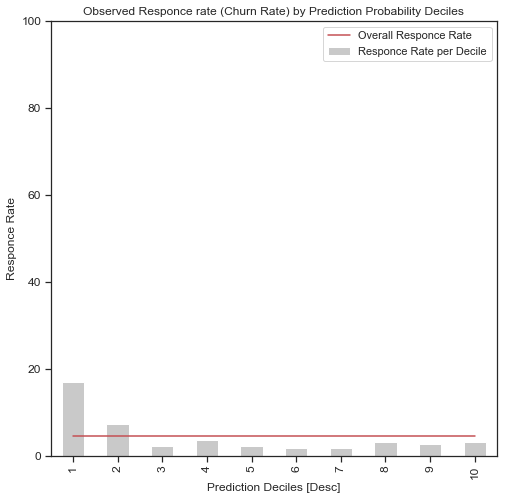

 ### III.b. Lift Chart



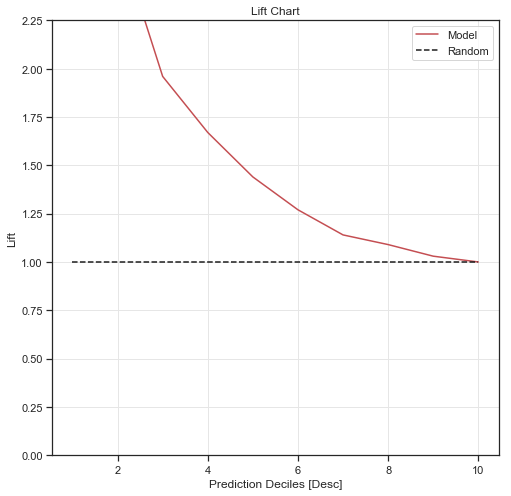

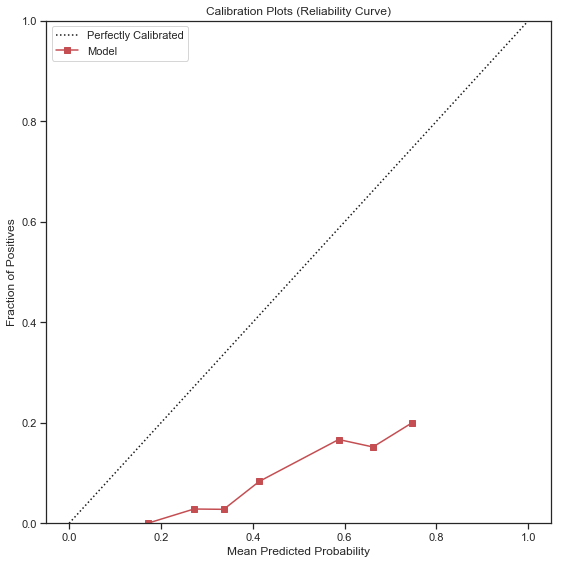

In [71]:
binary_classification_validation(validation_dataframe)

### Naïve Bayes

In [72]:
bayes =  sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True)
bayes.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
y_true = y_train
y_pred = bayes.predict(x_train)
y_pred_proba = bayes.predict_proba(x_train)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba

In [74]:
classifier_performance(bayes, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.95      0.94     34715
          1       0.35      0.29      0.31      3327

avg / total       0.88      0.89      0.89     38042

Confusion Matrix:
[[32900  1815]
 [ 2366   961]]
Accuracy: 0.8900951579832816
AUC: 0.7349502914820891


 #### Accuracy: 

Model Accuracy: 89.01%
 
Cohen's Kappa: 25.57%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.93      0.95      0.94     34715
          1       0.35      0.29      0.31      3327

avg / total       0.88      0.89      0.89     38042

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1       961      2366
Obsv = 0      1815     32900
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


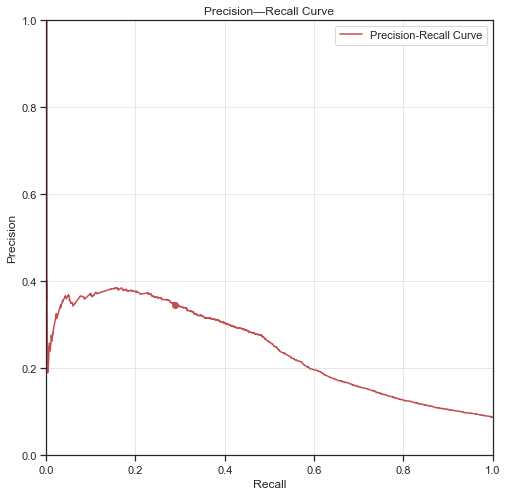


Area Under PR Curve (AP): 0.25
 ### I.b. Precision Recall and Queue plot


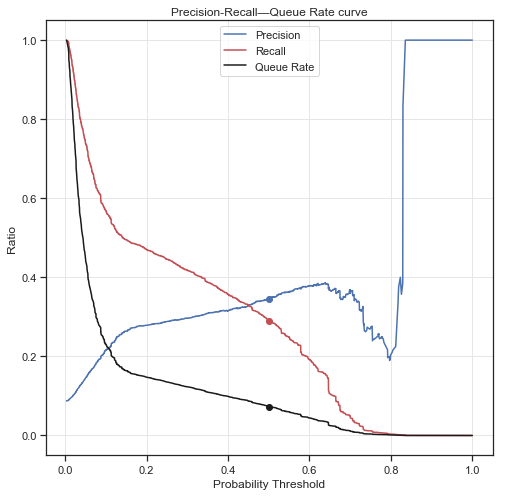

 # II. ROC
 ROC Plot


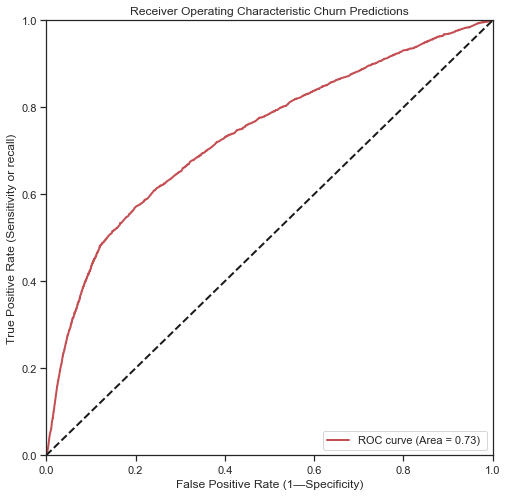

In [75]:
binary_classification_validation(df=validation_dataframe, lift=0)

In [76]:
y_true = y
y_pred = bayes.predict(x)
y_pred_proba = bayes.predict_proba(x)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba


In [77]:
classifier_performance(bayes, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2111
          1       0.27      0.07      0.11       100

avg / total       0.93      0.95      0.93      2211

Confusion Matrix:
[[2092   19]
 [  93    7]]
Accuracy: 0.9493441881501583
AUC: 0.6790525817148271


 #### Accuracy: 

Model Accuracy: 94.93%
 
Cohen's Kappa: 9.42%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2111
          1       0.27      0.07      0.11       100

avg / total       0.93      0.95      0.93      2211

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1         7        93
Obsv = 0        19      2092
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


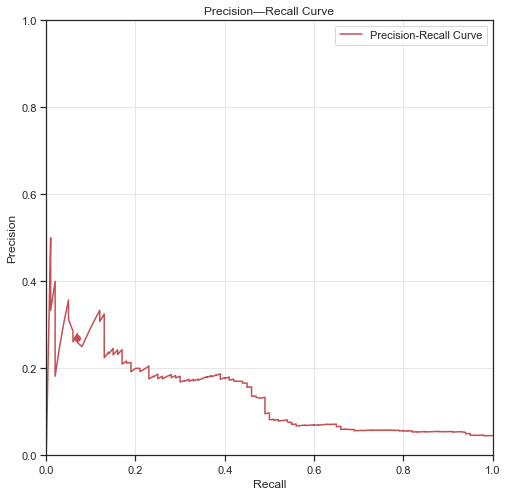


Area Under PR Curve (AP): 0.13
 ### I.b. Precision Recall and Queue plot


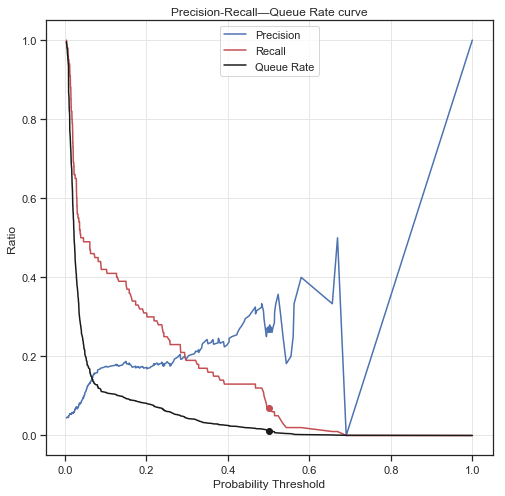

 # II. ROC
 ROC Plot


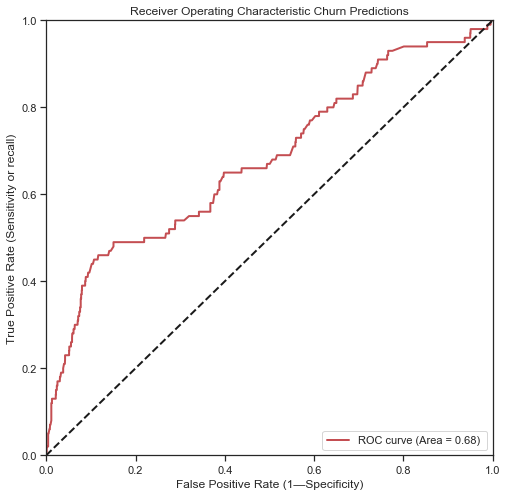

In [78]:
binary_classification_validation(validation_dataframe, lift=0)

### To tune 'Naïve Bayes' model we will try delete features which have strong correlations between each other. Dispite of 'Random Forest' which is robust to the correlation, 'Naïve Bayes' is not.

In [79]:
def get_corr(n1, n2):
    newdf = train_sample_.iloc[:,n1:n2]
    newdf = pd.concat([newdf, train_sample_['NETnewPos_S1_Target']], axis=1)
    mask = np.zeros_like(newdf.corr()*-1)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(newdf.corr(), mask=mask, annot=True)

In [80]:
train_sample_ = train_sample.drop(Colums_to_drop+['Sex_T', 'InCouponsTypes_invitation-venue','VisitsCount_6'], axis=1)

In [81]:
train_sample_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38042 entries, 2 to 49968
Data columns (total 52 columns):
NETnewPos_S1_Target                38042 non-null int64
VisitsCount_1                      38042 non-null uint8
VisitsCount_2                      38042 non-null uint8
VisitsCount_3                      38042 non-null uint8
VisitsCount_4                      38042 non-null uint8
VisitsCount_5                      38042 non-null uint8
Sex_F                              38042 non-null uint8
Sex_M                              38042 non-null uint8
Region_cherkasy                    38042 non-null uint8
Region_chernigivska                38042 non-null uint8
Region_dnipropetrovska             38042 non-null uint8
Region_donetska                    38042 non-null uint8
Region_khersonska                  38042 non-null uint8
Region_kyiv                        38042 non-null uint8
Region_kyivska                     38042 non-null uint8
Region_kyrovograd                  38042 non-null u

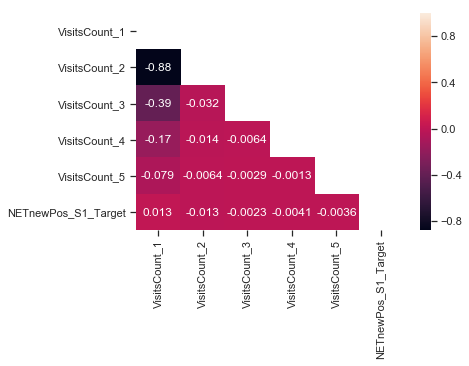

In [82]:
get_corr(1, 6)

We see the strong negative correlation between 'visitsCount_1' and 'visitsCount_2'.

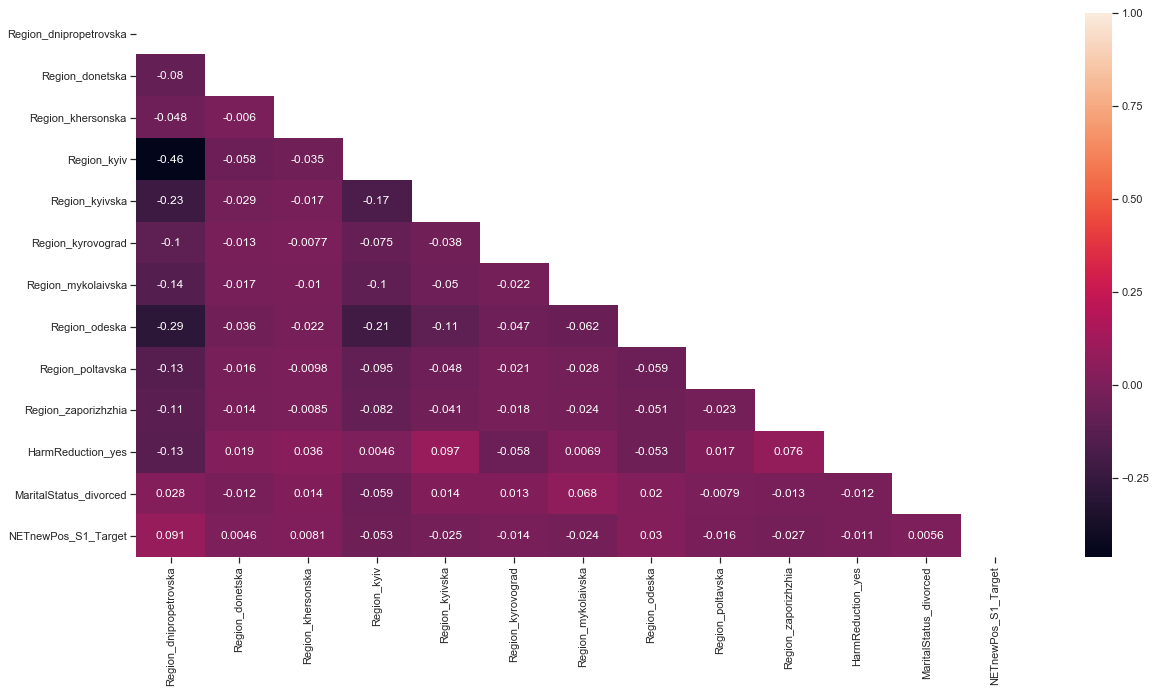

In [108]:
rcParams['figure.figsize'] = 20,10
get_corr(8, 20)

We do not have strong correlations between regions.

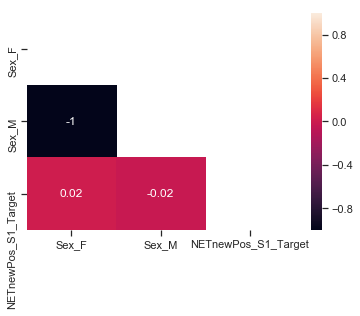

In [84]:
get_corr(6, 8)

Before we have deleted transgender sex why now it is not important to have male and female at the same time.

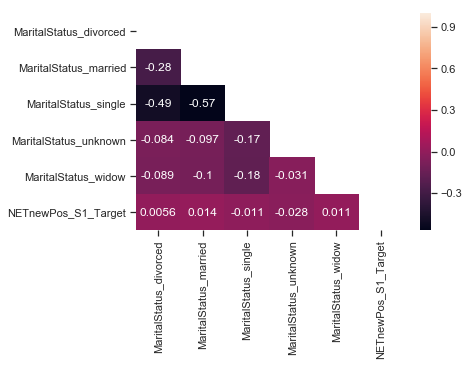

In [85]:
get_corr(21, 26)

We see the strong correlation between 'MaritalStatus_married' and 'MaritalStatus_single'.

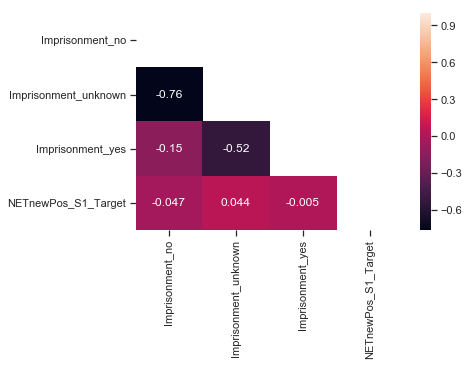

In [86]:
get_corr(27, 30)

We see the strong correlation between 'Imprisonment_yes' and 'MaritalStatus_unknown'.

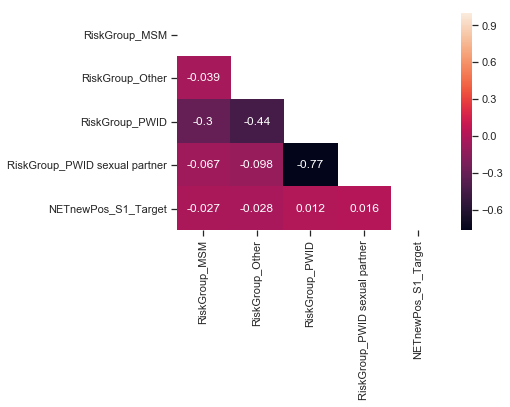

In [87]:
get_corr(30, 34)

We see the strong correlation between 'RiskGroup_PWID' and 'RiskGroup_PWID sexual partner'.

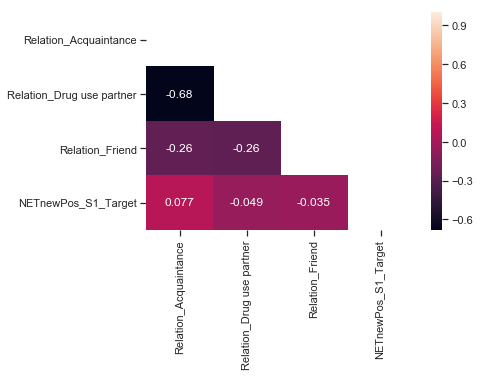

In [88]:
get_corr(34, 37)

We see the strong correlation between 'Relation_Acquaintance' and 'Relation_Drug use partner'.

Looking at the previous table of feature importance we can delete features with correlations.

In [24]:
to_drop_corr = ['Relation_Drug use partner', 'RiskGroup_PWID sexual partner',
                                    'Imprisonment_yes', 'MaritalStatus_married', 'Sex_M', 'VisitsCount_2']

In [ ]:
train_sample_ = train_sample_.drop(to_drop_corr, axis=1)

In [91]:
x_train = train_sample_.drop(target, axis=1)
y_train = train_sample['NETnewPos_S1_Target']
bayes =  sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True)
bayes.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
y_true = y_train
y_pred = bayes.predict(x_train)
y_pred_proba = bayes.predict_proba(x_train)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba

In [93]:
classifier_performance(bayes, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.95      0.94     34715
          1       0.35      0.28      0.31      3327

avg / total       0.88      0.89      0.89     38042

Confusion Matrix:
[[32972  1743]
 [ 2395   932]]
Accuracy: 0.8912254876189475
AUC: 0.7373561285959382


 #### Accuracy: 

Model Accuracy: 89.12%
 
Cohen's Kappa: 25.23%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.93      0.95      0.94     34715
          1       0.35      0.28      0.31      3327

avg / total       0.88      0.89      0.89     38042

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1       932      2395
Obsv = 0      1743     32972
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


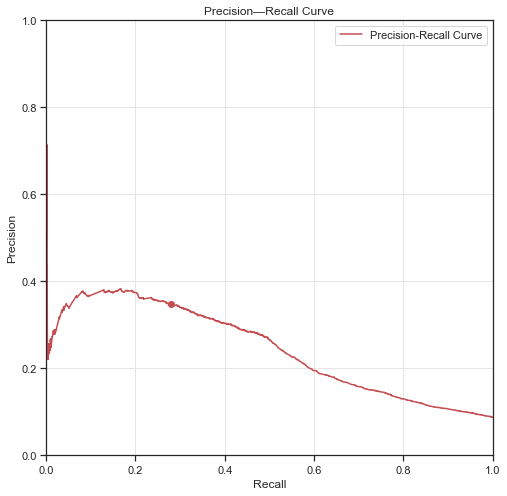


Area Under PR Curve (AP): 0.24
 ### I.b. Precision Recall and Queue plot


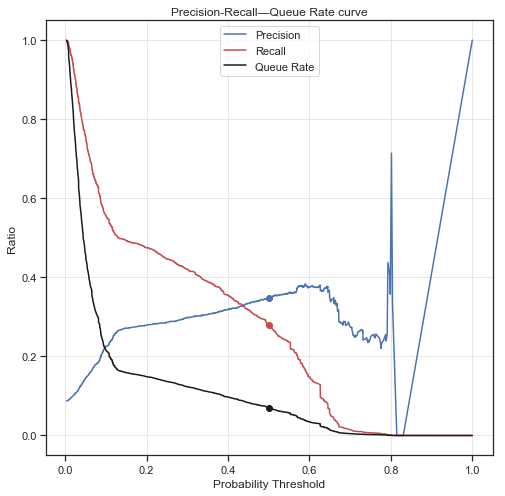

 # II. ROC
 ROC Plot


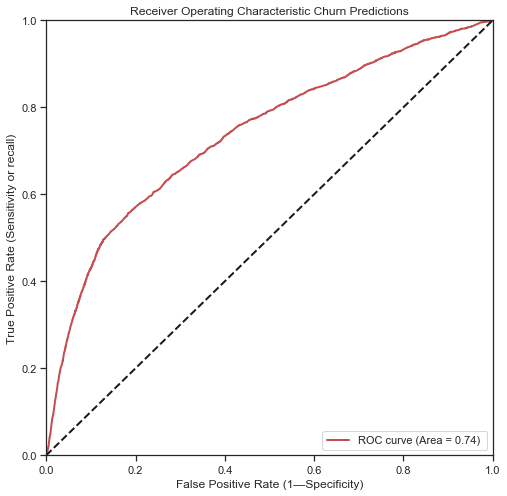

In [94]:
binary_classification_validation(df=validation_dataframe, lift=0)

In [95]:
x = test_sample.drop(Colums_to_drop+target+['Sex_T', 'InCouponsTypes_invitation-venue','VisitsCount_6']+to_drop_corr, axis=1)
y = test_sample['NETnewPos_S1_Target']

In [96]:
y_true = y
y_pred = bayes.predict(x)
y_pred_proba = bayes.predict_proba(x)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba


In [97]:
classifier_performance(bayes, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2111
          1       0.33      0.04      0.07       100

avg / total       0.93      0.95      0.93      2211

Confusion Matrix:
[[2103    8]
 [  96    4]]
Accuracy: 0.952962460425147
AUC: 0.6886783514921838


 #### Accuracy: 

Model Accuracy: 95.30%
 
Cohen's Kappa: 6.23%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2111
          1       0.33      0.04      0.07       100

avg / total       0.93      0.95      0.93      2211

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1         4        96
Obsv = 0         8      2103
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


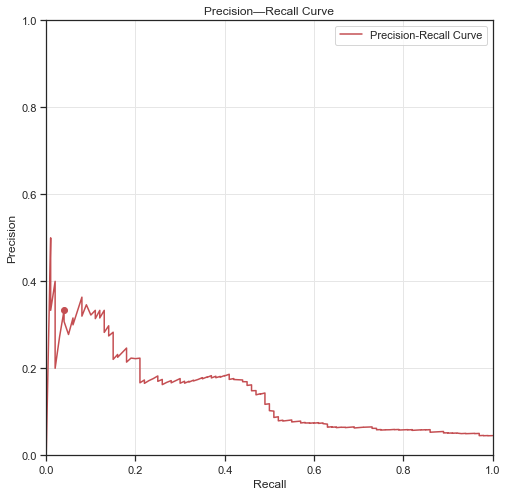


Area Under PR Curve (AP): 0.14
 ### I.b. Precision Recall and Queue plot


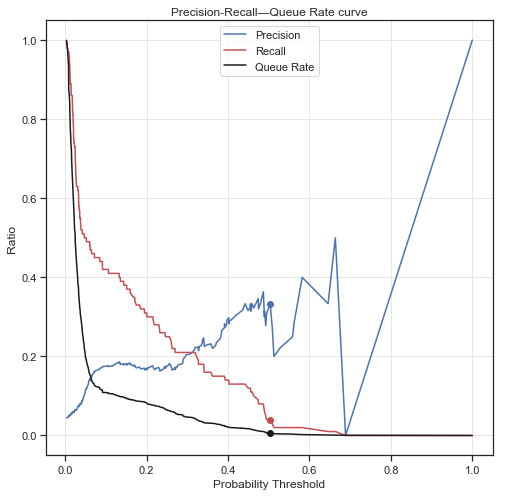

 # II. ROC
 ROC Plot


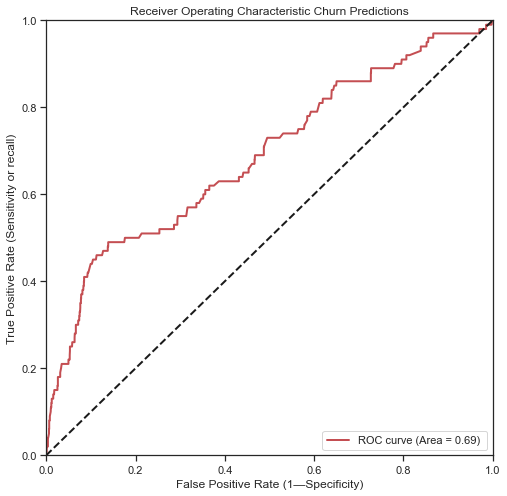

In [98]:
binary_classification_validation(df=validation_dataframe, lift=0)

### Nearest neighbors

In [99]:
neighbors = sklearn.neighbors.KNeighborsClassifier() # default value for n_neighbors is 5
# Train the model using the training sets and check score
neighbors.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
y_true = y_train
y_pred = neighbors.predict(x_train)
y_pred_proba = neighbors.predict_proba(x_train)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba

In [101]:
classifier_performance(neighbors, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     34715
          1       0.49      0.17      0.25      3327

avg / total       0.89      0.91      0.89     38042

Confusion Matrix:
[[34125   590]
 [ 2763   564]]
Accuracy: 0.9118605751537774
AUC: 0.7766260633789825


 #### Accuracy: 

Model Accuracy: 91.19%
 
Cohen's Kappa: 21.64%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     34715
          1       0.49      0.17      0.25      3327

avg / total       0.89      0.91      0.89     38042

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1       564      2763
Obsv = 0       590     34125
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


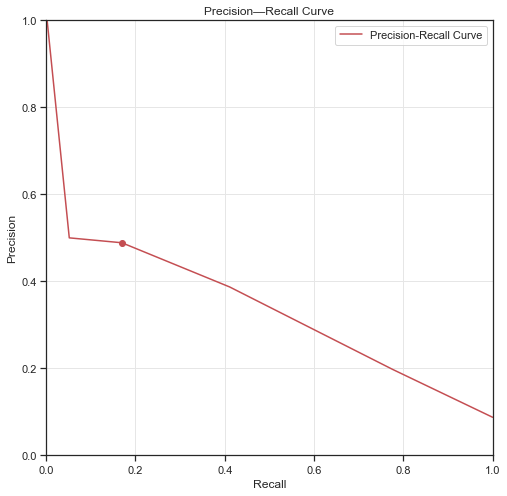


Area Under PR Curve (AP): 0.34
 ### I.b. Precision Recall and Queue plot


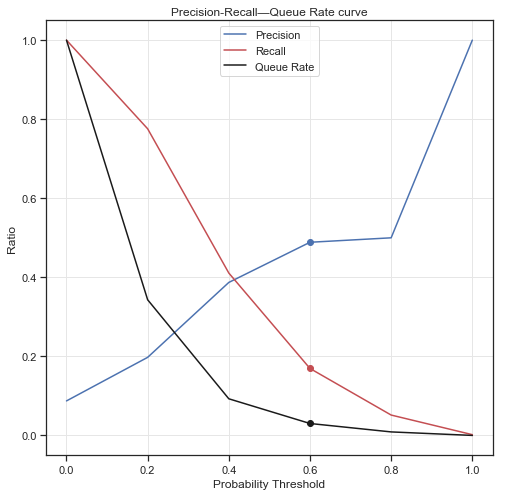

 # II. ROC
 ROC Plot


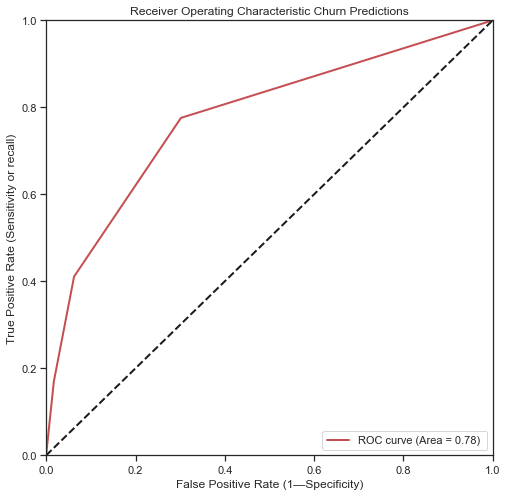

In [102]:
binary_classification_validation(df=validation_dataframe, lift=0)

In [103]:
y_true = y
y_pred = neighbors.predict(x)
y_pred_proba = neighbors.predict_proba(x)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba


In [104]:
classifier_performance(neighbors, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2111
          1       0.07      0.02      0.03       100

avg / total       0.92      0.94      0.93      2211

Confusion Matrix:
[[2085   26]
 [  98    2]]
Accuracy: 0.9439167797376753
AUC: 0.5953410705826623


 #### Accuracy: 

Model Accuracy: 94.39%
 
Cohen's Kappa: 1.17%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2111
          1       0.07      0.02      0.03       100

avg / total       0.92      0.94      0.93      2211

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1         2        98
Obsv = 0        26      2085
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


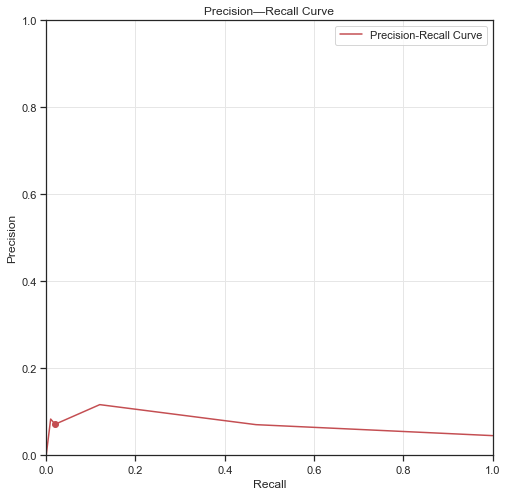


Area Under PR Curve (AP): 0.07
 ### I.b. Precision Recall and Queue plot


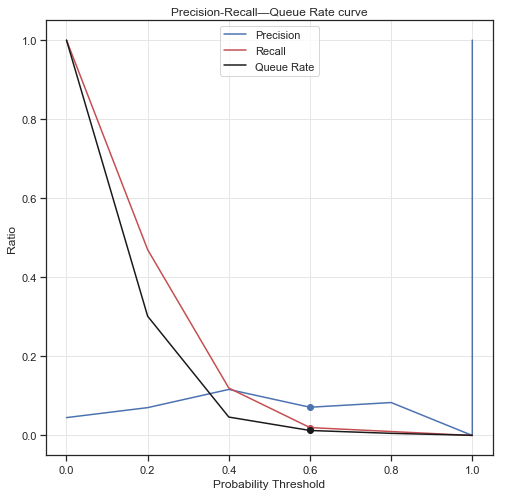

 # II. ROC
 ROC Plot


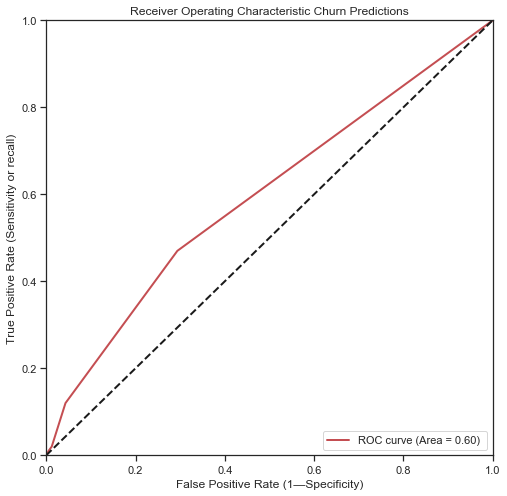

In [105]:
binary_classification_validation(df=validation_dataframe, lift=0)

### Tuning of Nearest neighbors

In [25]:
x_train = train_sample.drop(Colums_to_drop+target+to_drop_corr+['Sex_T', 'InCouponsTypes_invitation-venue','VisitsCount_6'], axis=1)
y_train = train_sample['NETnewPos_S1_Target']

In [28]:
x_train.columns

Index(['VisitsCount_1', 'VisitsCount_3', 'VisitsCount_4', 'VisitsCount_5',
       'Sex_F', 'Region_cherkasy', 'Region_chernigivska',
       'Region_dnipropetrovska', 'Region_donetska', 'Region_khersonska',
       'Region_kyiv', 'Region_kyivska', 'Region_kyrovograd',
       'Region_mykolaivska', 'Region_odeska', 'Region_poltavska',
       'Region_zaporizhzhia', 'HarmReduction_yes', 'MaritalStatus_divorced',
       'MaritalStatus_single', 'MaritalStatus_unknown', 'MaritalStatus_widow',
       'PatientZpt_yes', 'Imprisonment_no', 'Imprisonment_unknown',
       'RiskGroup_MSM', 'RiskGroup_Other', 'RiskGroup_PWID',
       'Relation_Acquaintance', 'Relation_Friend', 'Relation_Never met before',
       'Relation_Sexual partner', 'Relation_Spouse', 'Relation_Unknown',
       'OCFtest.result_positive', 'TypeofposART_Already in care',
       'TypeofposART_Positive LTFU', 'TypeofposART_Truly new positive',
       'InCouponsTypes_invitation', 'InCouponsTypes_peer',
       'InCouponsTypes_nan', 'Ag

In [29]:
neighbors = sklearn.neighbors.KNeighborsClassifier() # default value for n_neighbors is 5
params = {'n_neighbors':[5,6,7,8,9,10],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}
# run randomized search
n_iter_search = 10
model_gs = RandomizedSearchCV(neighbors, param_distributions=params,
                                   n_iter=n_iter_search, cv=5)

In [30]:
#Learning
model_gs.fit(x_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_gs.best_params_)

Best Hyper Parameters:
 {'weights': 'uniform', 'n_neighbors': 8, 'algorithm': 'kd_tree'}


In [26]:
neighbors = sklearn.neighbors.KNeighborsClassifier(weights='uniform', n_neighbors=8, leaf_size=2, algorithm='kd_tree') 
neighbors.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [27]:
x = test_sample.drop(Colums_to_drop+target+to_drop_corr+['Sex_T', 'InCouponsTypes_invitation-venue','VisitsCount_6'], axis=1)
y = test_sample['NETnewPos_S1_Target']

In [28]:
y_true = y_train
y_pred = neighbors.predict(x_train)
y_pred_proba = neighbors.predict_proba(x_train)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba

In [29]:
classifier_performance(neighbors, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.92      1.00      0.95     34715
          1       0.60      0.04      0.08      3327

avg / total       0.89      0.91      0.88     38042

Confusion Matrix:
[[34620    95]
 [ 3186   141]]
Accuracy: 0.9137532201251248
AUC: 0.7833266080390708


 #### Accuracy: 

Model Accuracy: 91.38%
 
Cohen's Kappa: 6.84%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.92      1.00      0.95     34715
          1       0.60      0.04      0.08      3327

avg / total       0.89      0.91      0.88     38042

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1       141      3186
Obsv = 0        95     34620
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


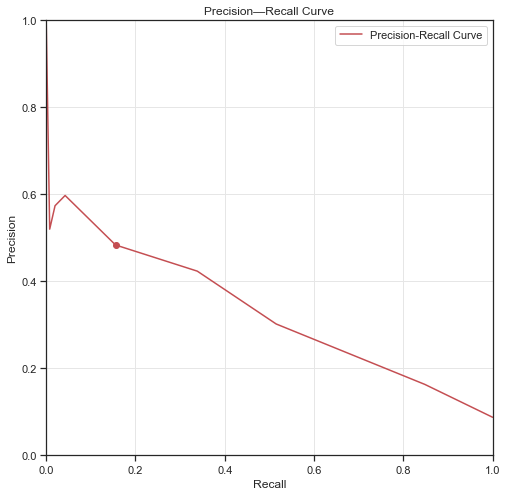


Area Under PR Curve (AP): 0.33
 ### I.b. Precision Recall and Queue plot


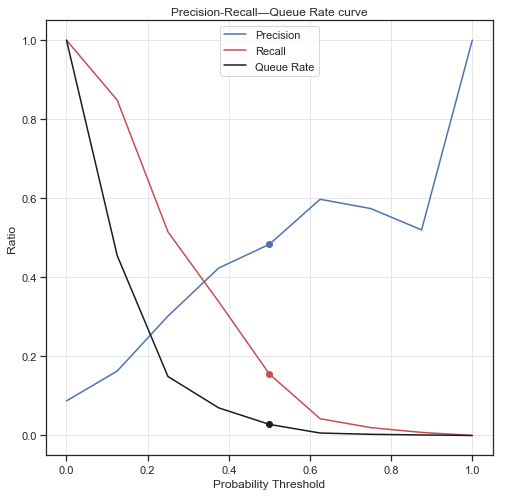

 # II. ROC
 ROC Plot


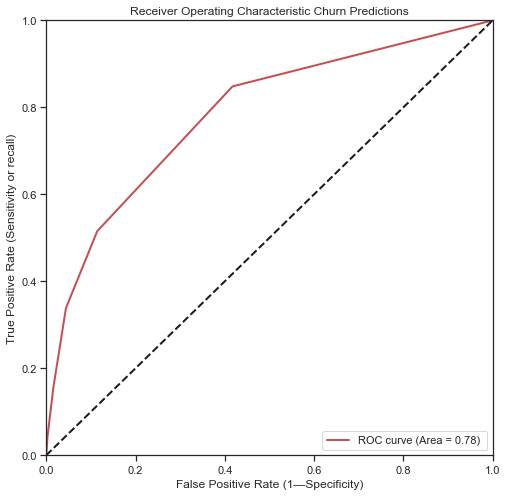

In [30]:
binary_classification_validation(df=validation_dataframe, lift=0)

In [31]:
y_true = y
y_pred = neighbors.predict(x)
y_pred_proba = neighbors.predict_proba(x)[:,1]
validation_dataframe = pd.DataFrame()
validation_dataframe['OBSERVED_TARGET'] = y_true
validation_dataframe['PREDICTED_TARGET'] = y_pred
validation_dataframe['EVENT_PROB'] = y_pred_proba

In [32]:
classifier_performance(neighbors, y_true, y_pred, y_pred_proba)

Predicted_Classes: [0 1]
Classification Report:
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2111
          1       0.20      0.02      0.04       100

avg / total       0.92      0.95      0.93      2211

Confusion Matrix:
[[2103    8]
 [  98    2]]
Accuracy: 0.9520578923563998
AUC: 0.6194173377546187


 #### Accuracy: 

Model Accuracy: 95.21%
 
Cohen's Kappa: 2.84%
 #### Classification Report: 
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2111
          1       0.20      0.02      0.04       100

avg / total       0.92      0.95      0.93      2211

 #### Confusion Matrix 
          Pred = 1  Pred = 0
Obsv = 1         2        98
Obsv = 0         8      2103
 # I. Precision Recall curve
 Calculations
 ### I.a. Precision-Reeall
 Plot Precision—Recall curve


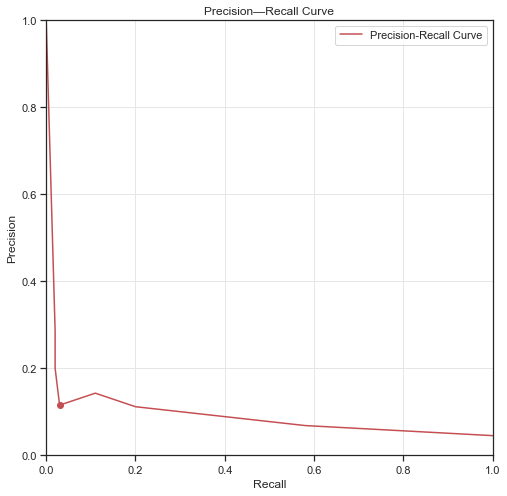


Area Under PR Curve (AP): 0.09
 ### I.b. Precision Recall and Queue plot


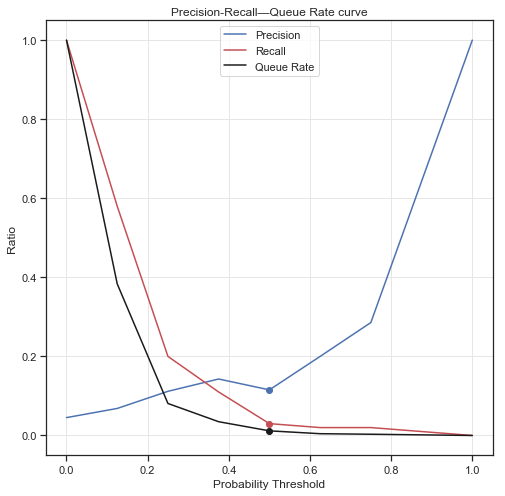

 # II. ROC
 ROC Plot


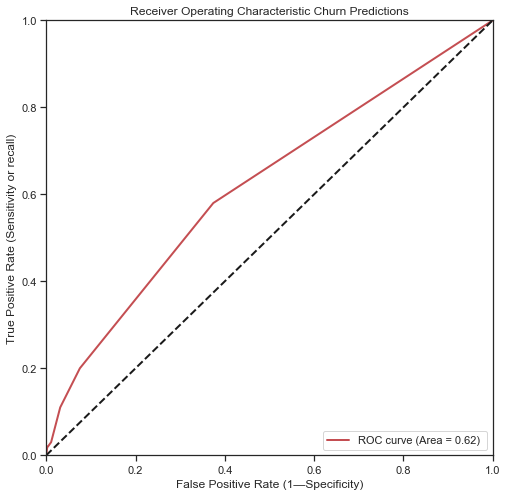

In [34]:
binary_classification_validation(df=validation_dataframe, lift=0)

## Conclusions

We have an imbalanced dataset.
As a result, when we fit classifiers on such datasets, we should use metrics other than accuracy when comparing models such as:
- F1 Score
- AUC (Area under ROC Curve)
Moreover, class imbalance influences a learning algorithm during training by making the decision rule biased towards the majority class by implicitly learning a model that optimized the predictions based on the majority class in the dataset.

Majority size visiting of the center by a person only one time for the period from '2017-01-03 ' to '2018-03-30'. There are data were factors are changing all the time. Regions were adding, the quantity of receiving coupons etcetera. The instability could influence income.

There are shown certain seasonality. In the period of April to August the most fruit period to register a new person. During the December to March, we saw descending. But to do presumptions we have to collect data for more years and investigate other reasons.

We looked at how much time is required to come a new person for each number of coupon, we also might learn how many coupons are unused.

The first Random Forrest model can see that classification report is really bad. The model does not make any adding value and gets its 91% accuracy simply by labeling all the records as "non-positives". 
After applying class weights and sample weights we obtain a more adequate model to predict getting new persons.
After deleting features with high correlation 'Naïve Bayes' showed the same result as Random Forest (AUC - 69% for both, F1 Score - 91% RF, 83% NB) on the testing model.
We obtained good ACU throuthg the last model Nearest neighbors on the train data - 78% and bad  on the test data.

It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

On the the test data F1-score for used models are:  **Nearest neighbors** class 0 - 0.98, class 1 - 0.04, total 0.97; **Naïve Bayes** class 0 - 0.98,  class 1 - 0.03, total 0.93; **Random Forest with Weights**  class 0 - 0.94,  class 1 - 0.24, Total 0.91; 
                     AUC **Nearest neighbors** 0.619; **Naïve Bayes** 0.595; **Random forest** 0.687.
                     
                     


